In [33]:
# All imports


from __future__ import print_function, division

#!pip install monai
import matplotlib.pyplot as plt
import numpy as np
import glob


import SimpleITK as sitk
import pandas as pd
import glob
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans

import csv
from scipy import ndimage, misc
from tqdm import tqdm

import numba
from numba import njit, prange

import os
import skimage.io as io
import skimage.transform as trans
import numpy as np

import scipy
from skimage.measure import label
from scipy.io import loadmat
from scipy.ndimage import zoom
#from scipy.misc import imresize
import pywt

import csv
import random
import time
%matplotlib inline  

from scipy import ndimage, misc

import pywt
#import hdf5storage

import scipy.io as sio
from skimage.filters import threshold_otsu
import matplotlib.patches as patches

import pywt
import numpy as np
#import pydicom
import matplotlib.pyplot as plt
import SimpleITK as sitk
import skimage.io as io
#from sklearn.decomposition import PCA
import collections, numpy
import warnings
from scipy import ndimage, misc
warnings.filterwarnings('ignore')
import copy


import os
import glob
import uuid
import numpy as np


import numpy
import warnings

import functools
import pickle
import time


import numpy as np

import argparse
import torch
import torch.utils.data as data_utils
import torch.optim as optim
from torch.autograd import Variable

import torch.nn as nn

from ipywidgets import IntProgress
#from ipywidgets import IProgress
# [STAR] All imports for DBT

import os
import pandas
%matplotlib inline
import matplotlib.pyplot as plt
from duke_dbt_data import dcmread_image, read_boxes, draw_box, evaluate
np.random.seed(0)
#torch.manual_seed(0)!pip install monai

# [STAR] All the Imports

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

from pathlib import Path
import ast
import pandas as pd
from PIL import Image

import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

import torch
import torchvision

from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator

from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SequentialSampler

from matplotlib import pyplot as plt
import re
import cv2

import random

In [2]:
# [STAR] Pytorch Models for training

import torch
from torch import nn
import torch.nn.functional as F
from torch.autograd import Variable

import matplotlib.pyplot as plt
import numpy as np
from torchsummary import summary

class up_conv(nn.Module):
    """
    Up Convolution Block
    """
    def __init__(self, in_ch, out_ch):
        super(up_conv, self).__init__()
        self.up = nn.Sequential(
            nn.Upsample(scale_factor=2),
            nn.Conv2d(in_ch, out_ch, kernel_size=3, stride=1, padding=1, bias=True),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        x = self.up(x)
        return x

class conv_block(nn.Module):
    """
    Convolution Block 
    """
    def __init__(self, in_ch, out_ch):
        super(conv_block, self).__init__()
        
        self.conv = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, kernel_size=3, stride=1, padding=1, bias=True),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, kernel_size=3, stride=1, padding=1, bias=True),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True))

    def forward(self, x):

        x = self.conv(x)
        return x

class Attention_block(nn.Module):
    """
    Attention Block
    """

    def __init__(self, F_g, F_l, F_int):
        super(Attention_block, self).__init__()

        self.W_g = nn.Sequential(
            nn.Conv2d(F_l, F_int, kernel_size=1, stride=1, padding=0, bias=True),
            nn.BatchNorm2d(F_int)
        )

        self.W_x = nn.Sequential(
            nn.Conv2d(F_g, F_int, kernel_size=1, stride=1, padding=0, bias=True),
            nn.BatchNorm2d(F_int)
        )

        self.psi = nn.Sequential(
            nn.Conv2d(F_int, 1, kernel_size=1, stride=1, padding=0, bias=True),
            nn.BatchNorm2d(1),
            nn.Sigmoid()
        )

        self.relu = nn.ReLU(inplace=True)

    def forward(self, g, x):
        g1 = self.W_g(g)
        x1 = self.W_x(x)
        psi = self.relu(g1 + x1)
        psi = self.psi(psi)
        out = x * psi
        return out

class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels, mid_channels=None):
        super().__init__()
        if not mid_channels:
            mid_channels = out_channels
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1),
            #nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1),
            #nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)

class DoubleConv_3D(nn.Module):
    def __init__(self, in_channels, out_channels, mid_channels=None):
        super().__init__()
        if not mid_channels:
            mid_channels = out_channels
        self.double_conv = nn.Sequential(
            nn.Conv3d(in_channels, mid_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv3d(mid_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)
    
class Down(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels)
        )

    def forward(self, x):
        return self.maxpool_conv(x)

class Down_3D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool3d(2),
            DoubleConv_3D(in_channels, out_channels)
        )

    def forward(self, x):
        return self.maxpool_conv(x)

class Up(nn.Module):
    def __init__(self, in_channels, out_channels, bilinear=True):
        super().__init__()

        # if bilinear, use the normal convolutions to reduce the number of channels
        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
            self.conv = DoubleConv(in_channels, out_channels, in_channels // 2)
        else:
            self.up = nn.ConvTranspose2d(in_channels , in_channels // 2, kernel_size=2, stride=2)
            self.conv = DoubleConv(in_channels, out_channels)


    def forward(self, x1, x2):
        x1 = self.up(x1)
        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                        diffY // 2, diffY - diffY // 2])
        # if you have padding issues, see
        # https://github.com/HaiyongJiang/U-Net-Pytorch-Unstructured-Buggy/commit/0e854509c2cea854e247a9c615f175f76fbb2e3a
        # https://github.com/xiaopeng-liao/Pytorch-UNet/commit/8ebac70e633bac59fc22bb5195e513d5832fb3bd
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)

class Up_3D(nn.Module):
    def __init__(self, in_channels, out_channels, bilinear=True):
        super().__init__()

        # if bilinear, use the normal convolutions to reduce the number of channels
        if bilinear:
            self.up   = nn.Upsample(scale_factor=2, mode='trilinear', align_corners=True)
            self.conv = DoubleConv_3D(in_channels, out_channels, in_channels // 2)
        else:
            self.up = nn.ConvTranspose2d(in_channels , in_channels // 2, kernel_size=2, stride=2)
            self.conv = DoubleConv(in_channels, out_channels)


    def forward(self, x1, x2):
        x1 = self.up(x1)
        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                        diffY // 2, diffY - diffY // 2])
        # if you have padding issues, see
        # https://github.com/HaiyongJiang/U-Net-Pytorch-Unstructured-Buggy/commit/0e854509c2cea854e247a9c615f175f76fbb2e3a
        # https://github.com/xiaopeng-liao/Pytorch-UNet/commit/8ebac70e633bac59fc22bb5195e513d5832fb3bd
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)

class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(OutConv, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        return self.conv(x)

class OutConv_3D(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(OutConv_3D, self).__init__()
        self.conv = nn.Conv3d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        return self.conv(x)

class SUNet(nn.Module):
    def __init__(self, n_channels, n_classes, bilinear=True):
        super(SUNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes  = n_classes
        self.bilinear   = bilinear

        self.inc = DoubleConv(n_channels, 16)
        self.down1 = Down(16, 32)
        self.down2 = Down(32, 64)
        self.down3 = Down(64, 128)
        factor = 2 if bilinear else 1
        self.down4 = Down(128, 256 // factor)
        self.up1 = Up(256, 128 // factor, bilinear)
        self.up2 = Up(128, 64 // factor, bilinear)
        self.up3 = Up(64, 32 // factor, bilinear)
        self.up4 = Up(32, 16, bilinear)
        self.outc = OutConv(16, n_classes)
        #self.out_sigmoid = nn.Sigmoid()
        self.out_softmax = nn.LogSoftmax(dim=1)
        
        self.gn1 = nn.GroupNorm(8, 16)
        self.gn2 = nn.GroupNorm(16, 32)
        self.gn3 = nn.GroupNorm(32, 64)
        self.gn4 = nn.GroupNorm(64, 128)
        self.gn5 = nn.GroupNorm(32, 64)
        self.gn6 = nn.GroupNorm(16, 32)
        self.gn7 = nn.GroupNorm(8, 16)
        
        self.dp1 = nn.Dropout(p=0.2)
        self.dp2 = nn.Dropout(p=0.2)
    
    def forward(self, x):
        x1 = self.inc(x)
        x1 = self.gn1(x1)
        
        x2 = self.down1(x1)
        x2 = self.gn2(x2)
        
        x3 = self.down2(x2)
        x3 = self.gn3(x3)
        #x3 = self.dp1(x3)
        
        x4 = self.down3(x3)
        x4 = self.gn4(x4)
        #x4 = self.dp2(x4)
        
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.gn5(x)
       
        x = self.up2(x, x3)
        x = self.gn6(x)
            
        x = self.up3(x, x2)
        x = self.gn7(x)
        
        x  = self.up4(x, x1)
        
        logits = self.outc(x)
        #out    = self.out_softmax(logits)
        return logits

class SUNet_3D(nn.Module):
    def __init__(self, n_channels, n_classes, bilinear=True):
        super(SUNet_3D, self).__init__()
        self.n_channels = n_channels
        self.n_classes  = n_classes
        self.bilinear   = bilinear

        self.inc   = DoubleConv_3D(n_channels, 16)
        self.down1 = Down_3D(16, 32)
        self.down2 = Down_3D(32, 64)
        self.down3 = Down_3D(64, 128)
        factor = 2 if bilinear else 1
        self.down4 = Down_3D(128, 256 // factor)
        self.up1 = Up_3D(256, 128 // factor, bilinear)
        self.up2 = Up_3D(128, 64 // factor, bilinear)
        self.up3 = Up_3D(64, 32 // factor, bilinear)
        self.up4 = Up_3D(32, 16, bilinear)
        self.outc = OutConv_3D(16, n_classes)
        #self.out_sigmoid = nn.Sigmoid()
        self.out_softmax = nn.LogSoftmax(dim=1)
        
        self.gn1 = nn.GroupNorm(8, 16)
        self.gn2 = nn.GroupNorm(16, 32)
        self.gn3 = nn.GroupNorm(32, 64)
        self.gn4 = nn.GroupNorm(64, 128)
        self.gn5 = nn.GroupNorm(32, 64)
        self.gn6 = nn.GroupNorm(16, 32)
        self.gn7 = nn.GroupNorm(8, 16)
        
        self.dp1 = nn.Dropout(p=0.2)
        self.dp2 = nn.Dropout(p=0.2)
    
    def forward(self, x):
        x1 = self.inc(x)
        x1 = self.gn1(x1)
        
        x2 = self.down1(x1)
        x2 = self.gn2(x2)
        
        x3 = self.down2(x2)
        x3 = self.gn3(x3)
        #x3 = self.dp1(x3)
        
        x4 = self.down3(x3)
        x4 = self.gn4(x4)
        #x4 = self.dp2(x4)
        
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.gn5(x)
       
        x = self.up2(x, x3)
        x = self.gn6(x)
            
        x = self.up3(x, x2)
        x = self.gn7(x)
        
        x  = self.up4(x, x1)
        
        logits = self.outc(x)
        #out    = self.out_softmax(logits)
        return logits

class SUNet_with_BN(nn.Module):
    def __init__(self, n_channels, n_classes, bilinear=True):
        super(SUNet_with_BN, self).__init__()
        self.n_channels = n_channels
        self.n_classes  = n_classes
        self.bilinear   = bilinear

        self.inc = DoubleConv(n_channels, 16)
        self.down1 = Down(16, 32)
        self.down2 = Down(32, 64)
        self.down3 = Down(64, 128)
        factor = 2 if bilinear else 1
        self.down4 = Down(128, 256 // factor)
        self.up1 = Up(256, 128 // factor, bilinear)
        self.up2 = Up(128, 64 // factor, bilinear)
        self.up3 = Up(64, 32 // factor, bilinear)
        self.up4 = Up(32, 16, bilinear)
        self.outc = OutConv(16, n_classes)
        #self.out_sigmoid = nn.Sigmoid()
        self.out_softmax = nn.LogSoftmax(dim=1)
        
        self.gn1 = nn.BatchNorm2d(16)
        self.gn2 = nn.BatchNorm2d(32)
        self.gn3 = nn.BatchNorm2d(64)
        self.gn4 = nn.BatchNorm2d(128)
        self.gn5 = nn.BatchNorm2d(64)
        self.gn6 = nn.BatchNorm2d(32)
        self.gn7 = nn.BatchNorm2d(16)
        
        self.dp1 = nn.Dropout(p=0.4)
        self.dp2 = nn.Dropout(p=0.4)
    
    def forward(self, x):
        x1 = self.inc(x)
        x1 = self.gn1(x1)
        
        x2 = self.down1(x1)
        x2 = self.gn2(x2)
        
        x3 = self.down2(x2)
        x3 = self.gn3(x3)
       
        x4 = self.down3(x3)
        x4 = self.gn4(x4)
       
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.gn5(x)
       
        x = self.up2(x, x3)
        x = self.gn6(x)
            
        x = self.up3(x, x2)
        x = self.gn7(x)
        
        x  = self.up4(x, x1)
        
        logits = self.outc(x)
        #out    = self.out_softmax(logits)
        return logits

class SUNet_without_GN(nn.Module):
    def __init__(self, n_channels, n_classes, bilinear=True):
        super(SUNet_without_GN, self).__init__()
        self.n_channels = n_channels
        self.n_classes  = n_classes
        self.bilinear   = bilinear

        self.inc = DoubleConv(n_channels, 16)
        self.down1 = Down(16, 32)
        self.down2 = Down(32, 64)
        self.down3 = Down(64, 128)
        factor = 2 if bilinear else 1
        self.down4 = Down(128, 256 // factor)
        self.up1 = Up(256, 128 // factor, bilinear)
        self.up2 = Up(128, 64 // factor, bilinear)
        self.up3 = Up(64, 32 // factor, bilinear)
        self.up4 = Up(32, 16, bilinear)
        self.outc = OutConv(16, n_classes)
        
    
    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        
        x5 = self.down4(x4)
        x  = self.up1(x5, x4)
        x  = self.up2(x, x3)
        x  = self.up3(x, x2)
        x  = self.up4(x, x1)
        
        logits = self.outc(x)
        
        return logits

class AttnDecoderRNN_old(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1, max_length=256, bilinear=True):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length
        self.bilinear = bilinear
        self.n_classes = 1

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        self.attn = nn.Linear(self.hidden_size*2, self.max_length)
        
        self.attn_24 = nn.Linear(self.hidden_size*4, self.hidden_size*2)
        
        self.attn_combine = nn.Linear(self.hidden_size * 2, self.hidden_size)
        
        self.attn_combine_bilstm = nn.Linear(self.hidden_size * 3, self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.gru = nn.GRU(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size, self.output_size)
       # self.hidden = nn.Parameter(torch.randn(4,256,256).cuda()),nn.Parameter(torch.randn(4,256,256).cuda())
       
        self.lsgn_a = nn.GroupNorm(128,256)
    
        self.down5 = Down(128,256)
        
        factor = 2 if bilinear else 1
                
        self.ups4 = nn.ConvTranspose2d(256 , 256 // 2, kernel_size=2, stride=2)
        self.upsconv4 = DoubleConv(256,128)

        self.lstm = nn.LSTM(256,256,batch_first=False,bidirectional=True,num_layers=1).cuda()
    
    def forward(self, input,hidden,encoder_outputs):
        
        h = torch.unsqueeze(hidden,0)
        
        embedded = input
        
        embedded = self.dropout(embedded)

        hidden_bilstm = h[0]
        
        
        hidden_bilinn =  hidden_bilstm
        
        hidden_bilinn = self.attn(hidden_bilinn)
    
        hidden_bilinn = self.lsgn_a(hidden_bilinn)

        attn_weights = F.softmax(self.attn(torch.cat((embedded[0], hidden_bilinn), 1)), dim=1)
        
        
        
        attn_weights  = self.lsgn_a(attn_weights)
    
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),encoder_outputs.unsqueeze(0))
        
   #     print('attn_applied: encoder outputs',attn_applied[0].shape,encoder_outputs[0].shape)

        output = torch.cat((embedded[0], attn_applied[0]), 1)
  #      print('The output shape is : ',output.shape)
        
        output = self.attn_combine_bilstm(output).unsqueeze(0)
 #      print('The output shape after is : ',output.shape)
        
    
        hidden_bi = hidden_bilinn.unsqueeze(0)
        
        output = F.relu(output)
        
        #print("output and hidden before lstm ",output.shape,hidden_bi.shape)

        output, hidden = self.gru(output, hidden_bi)
        
        output = F.log_softmax(self.out(output[0]), dim=1)
        output = self.lsgn_a(output)
        
       #output = self.lsgn_a(output)
    
        return output,hidden


    def initHidden(self):
        return torch.randn(4, 256, self.hidden_size, device=device)

############### MAIN MODEL ##############
class UNetDoubleSmallGroupNormdifferent_old(nn.Module):
    def __init__(self, n_channels, n_classes,bilinear=True):
        
        super(UNetDoubleSmallGroupNormdifferent, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear

        self.inc = DoubleConv(n_channels, 16)
        self.down1 = Down(16, 32)
        self.down2 = Down(32, 64)
        self.down3 = Down(64, 128)
        factor = 2 if bilinear else 1
        self.down4 = Down(128, 256 // factor)

        
        self.down5 = Down(128,256)
        
        
        self.up1 = Up(256, 128 // factor, bilinear)
        self.up2 = Up(128, 64 // factor, bilinear)
        self.up3 = Up(64, 32 // factor, bilinear)
        self.up4 = Up(32, 16, bilinear)
        self.outc = OutConv(16, n_classes)
        #self.out_sigmoid = nn.Sigmoid()
        self.out_softmax = nn.LogSoftmax(dim=1)
        
        self.lsgn1 = nn.GroupNorm(128,256)
        
        self.lsgn2 = nn.GroupNorm(64,256)
        
        
        self.gn1 = nn.GroupNorm(8, 16)
        self.gn2 = nn.GroupNorm(16, 32)
        self.gn3 = nn.GroupNorm(32, 64)
        self.gn4 = nn.GroupNorm(64, 128)
        self.gn5 = nn.GroupNorm(32, 64)
        self.gn6 = nn.GroupNorm(16, 32)
        self.gn7 = nn.GroupNorm(8, 16)
   
    def forward(self, x):
        x1 = self.inc(x)
       # x1 = self.gn1(x1)
       
        x2 = self.down1(x1)
       # x2 = self.gn2(x2)
       
        x3 = self.down2(x2)
       # x3 = self.gn3(x3)
       
        x4 = self.down3(x3)
       # x4 = self.gn4(x4)
       
        x5 = self.down4(x4)
        
        #x5 = torch.squeeze(x5)
        x5 = self.down5(x5)
        #x5 = self.down6(x5)
        
        #print('x5 shape is :',x5.shape)
        
        xlst = x5.reshape([4,256,256])

        lstm = nn.LSTM(256,256,batch_first= True,bidirectional=True,num_layers=1).cuda()
                
        #print('xlst',xlst.shape)    
        
        xlst = self.lsgn1(xlst)
        
        ylst = lstm(xlst)
        
        
        #print(hidden)
        
        f = np.asarray(ylst)
        
        h  = torch.cuda.FloatTensor(ylst[0])
        
        
        h = torch.squeeze(h)
        
        encoder_o = f[0]
        
        a = np.zeros((4,256,256))

        a = torch.from_numpy(a)
        a.cuda()
        
        for i in range(4):
    
            oo,b = attn_decoder1.forward(xlst,h[i],encoder_o[i])
            oo = self.lsgn2(oo)
            a[i] = oo
        
            
        a = a.unsqueeze(0)
        a = a.reshape([4,256,16,16])
        
        
        
        x5 = a  
        x5 = x5.cuda()
        
        
        x5 = x5.type(torch.cuda.FloatTensor)
 
        
        
        x5 = self.lsgn2(x5)
        
        ups4 = nn.ConvTranspose2d(256 , 256 // 2, kernel_size=2, stride=2)
        upsconv4 = DoubleConv(256,128)

        ups4 = ups4.cuda()
        
        opt = ups4(x5)
        
        x5 = opt
        
        x = self.up1(x5, x4)
        #x = self.gn5(x)
        
        x = self.up2(x, x3)
       # x = self.gn6(x)
       
        x = self.up3(x, x2)
        #x = self.gn7(x)
       
        x = self.up4(x, x1)
        logits = self.outc(x)
        #out    = self.out_softmax(logits)
        return logits

class UNetDoubleSmallGroupNormdifferent(nn.Module):
    def __init__(self, n_channels, n_classes,bilinear=True):
        super(UNetDoubleSmallGroupNormdifferent, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear

        self.inc     = DoubleConv(n_channels, 16)
        self.down1   = Down(16, 32)
        self.downnew = Down(16,16)
        self.down2   = Down(32, 64)
        self.down3   = Down(64, 128)
        factor = 2 if bilinear else 1
        self.down4   = Down(128, 256 // factor) 
        self.upsam   = nn.Upsample(scale_factor=2, mode='nearest')
        
        self.down5 = Down(128,256)
        self.ups3  = nn.ConvTranspose2d(1 , 1, kernel_size=2, stride=2)
        self.ups4  = nn.ConvTranspose2d(256 , 256 // 2, kernel_size=2, stride=2)
        
        self.up1 = Up(256, 128 // factor, bilinear)
        self.up2 = Up(128, 64 // factor, bilinear)
        self.up3 = Up(64, 32 // factor, bilinear)
        self.up4 = Up(32, 16, bilinear)
        self.outc = OutConv(16, n_classes)
        #self.out_sigmoid = nn.Sigmoid()
        self.out_softmax = nn.LogSoftmax(dim=1)
        
        self.lsgn1 = nn.GroupNorm(64,128)
        self.lsgn2 = nn.GroupNorm(64,1024)
        self.lsgn3 = nn.GroupNorm(64,1024)
        
        self.gn1 = nn.GroupNorm(8, 16)
        self.gn2 = nn.GroupNorm(16, 32)
        self.gn3 = nn.GroupNorm(32, 64)
        self.gn4 = nn.GroupNorm(64, 128)
        self.gn5 = nn.GroupNorm(32, 64)
        self.gn6 = nn.GroupNorm(16, 32)
        self.gn7 = nn.GroupNorm(8, 16)
        self.gn8 = nn.GroupNorm(4,8)
   
    def forward(self, x):
        #x = self.upsam()
        
        x1 = self.inc(x)
        #x1 = self.gn1(x1)
       
        x2 = self.down1(x1)
        #x2 = self.gn2(x2)
       
        x3 = self.down2(x2)
        #x3 = self.gn3(x3)
       
        x4 = self.down3(x3)
        #x4 = self.gn4(x4)
       
        x5 = self.down4(x4)
        #x5 = self.gn
        #x5 = torch.squeeze(x5)
        #x5 = self.down5(x5)
        #x5 = self.down6(x5)
        #print('x5:',x5.shape)
        
        xlst = x5.reshape([4,128,1024])
        

        lstm = nn.LSTM(1024,1024,batch_first= True,bidirectional=True,num_layers=1).cuda()
        
        xlst = self.lsgn1(xlst)
        ylst = lstm(xlst)
        
        f = np.asarray(ylst)
        
        h  = torch.cuda.FloatTensor(ylst[0])
        h = torch.squeeze(h)
        
        encoder_o = f[0]
        
        a = np.zeros((4,128,1024))
        #a = ndarray((4,128,1024))

        a = torch.from_numpy(a)
        a.cuda()
        
        for i in range(4):
            oo,b = attn_decoder1.forward(xlst,h[i],encoder_o[i])
            oo   = self.lsgn2(oo)
            a[i] = oo
        
            
        a = a.unsqueeze(0)
        a = a.reshape([4,128,32,32])
        
        
        x5 = a  
        x5 = x5.cuda()
        
        
        x5 = x5.type(torch.cuda.FloatTensor)
        #x5 = self.lsgn3(x5)
        
        #x5 = self.ups4(x5)
    
        x = self.up1(x5, x4)
        #x = self.gn5(x)
        
        x = self.up2(x, x3)
        #x = self.gn6(x)
       
        x = self.up3(x, x2)
        #x = self.gn7(x)
       
        x = self.up4(x, x1)
        #x = self.gn7(x)

        #x = self.downnew(x)
        
        #out    = self.out_softmax(logits)
        
        logits = self.outc(x)
        
        return logits

class UNetDoubleSmallWithoutGN(nn.Module):
    def __init__(self, n_channels, n_classes,bilinear=True):
        
        super(UNetDoubleSmallWithoutGN, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear

        self.inc   = DoubleConv(n_channels, 16)
        self.down1 = Down(16, 32)
        self.down2 = Down(32, 64)
        self.down3 = Down(64, 128)
        factor = 2 if bilinear else 1
        self.down4 = Down(128, 256 // factor)
        self.down5 = Down(128,256)
        
        self.up1 = Up(256, 128 // factor, bilinear)
        self.up2 = Up(128, 64 // factor, bilinear)
        self.up3 = Up(64, 32 // factor, bilinear)
        self.up4 = Up(32, 16, bilinear)
        self.outc = OutConv(16, n_classes)
        
    def forward(self, x):
        x1 = self.inc(x)
       # x1 = self.gn1(x1)
       
        x2 = self.down1(x1)
       # x2 = self.gn2(x2)
       
        x3 = self.down2(x2)
       # x3 = self.gn3(x3)
       
        x4 = self.down3(x3)
       # x4 = self.gn4(x4)
       
        x5 = self.down4(x4)
        
        #x5 = torch.squeeze(x5)
        x5 = self.down5(x5)
        #x5 = self.down6(x5)
        
        ups4     = nn.ConvTranspose2d(256 , 256 // 2, kernel_size=2, stride=2)
        upsconv4 = DoubleConv(256,128)
        ups4 = ups4.cuda()
        
        opt = ups4(x5)
        
        x5 = opt
        
        x = self.up1(x5, x4)
        #x = self.gn5(x)
        
        x = self.up2(x, x3)
       # x = self.gn6(x)
       
        x = self.up3(x, x2)
        #x = self.gn7(x)
       
        x = self.up4(x, x1)
        logits = self.outc(x)
        #out    = self.out_softmax(logits)
        return logits

class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1, max_length=128, bilinear=True):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p   = dropout_p
        self.max_length  = max_length
        self.bilinear    = bilinear
        self.n_classes   = 1

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        self.attn      = nn.Linear(2048, 1024)
        
        self.attn2   = nn.Linear(1024, 128)
        
        self.attn_24 = nn.Linear(self.hidden_size*4, self.hidden_size*2)
        
        self.attn_combine = nn.Linear(self.hidden_size * 2, self.hidden_size)
        
        self.attn_combine_bilstm = nn.Linear(3072, 1024)
        self.dropout = nn.Dropout(self.dropout_p)
        self.gru     = nn.GRU(1024, 1024)
        self.out     = nn.Linear(1024, 1024)
       # self.hidden = nn.Parameter(torch.randn(4,256,256).cuda()),nn.Parameter(torch.randn(4,256,256).cuda())
       
        #self.lsgn_a = nn.GroupNorm(512,1024)
        self.lsbn_a1 = nn.BatchNorm1d(1024)
        #self.lsgn_a2 = nn.GroupNorm(512,1024)
        
        #self.lsgn_in = nn.GroupNorm(64,128)
        self.lsbn_in1 = nn.BatchNorm1d(2048)
        self.lsbn_in2 = nn.BatchNorm1d(1024)
        
        
        self.lsbn_in3 = nn.BatchNorm1d(128)#nn.GroupNorm(64,   128)
        self.lsbn_in4 = nn.BatchNorm1d(128)#nn.GroupNorm(64,   128)
        self.lsbn_in5 = nn.BatchNorm1d(1024)#nn.GroupNorm(512,  1024)
        
        self.down5 = Down(128,256)
        
        factor = 2 if bilinear else 1
                
        self.ups4     = nn.ConvTranspose2d(256 , 256 // 2, kernel_size=2, stride=2)
        self.upsconv4 = DoubleConv(256,128)

        self.lstm = nn.LSTM(256,256,batch_first=False,bidirectional=True,num_layers=1).cuda()
    
    def forward(self, input,hidden,encoder_outputs):
        
        h        = torch.unsqueeze(hidden, 0)
        embedded = input
        #embedded = self.lsgn_in1(embedded)
        embedded = self.dropout(embedded)
        
        hidden_bilstm = h[0]
        hidden_bilinn = hidden_bilstm
        
        hidden_bilinn = self.attn(hidden_bilinn)
        hidden_bilinn = self.lsbn_a1(hidden_bilinn)
        
        hidden_bi     = hidden_bilinn.unsqueeze(0)
        
        #print(hidden_bilinn.shape)
        
        attn_weights  = torch.cat((embedded[0], hidden_bilinn), 1)
        attn_weights  = self.lsbn_in1(attn_weights)
        
        attn_weights  = self.attn(attn_weights)
        attn_weights  = self.lsbn_in2(attn_weights)
        
        attn_weights  = F.softmax(attn_weights, dim=1)
        
        attn_weights  = self.attn2(attn_weights)
        attn_weights  = self.lsbn_in3(attn_weights)
        
        #print(attn_weights.unsqueeze(0).shape,encoder_outputs.unsqueeze(0).shape)
    
        attn_applied = torch.bmm(attn_weights.unsqueeze(0), encoder_outputs.unsqueeze(0))
        
        #print('attn_applied: encoder outputs',attn_applied[0].shape,encoder_outputs[0].shape)

        output = torch.cat((embedded[0], attn_applied[0]), 1)
        
        output = self.attn_combine_bilstm(output).unsqueeze(0)
        output = F.relu(output)
        output = self.lsbn_in4(output)
        
        output, hidden = self.gru(output, hidden_bi)
        
        output = self.out(output[0])
        output = self.lsbn_in5(output)
        output = F.log_softmax(output, dim=1)
        return output, hidden


    def initHidden(self):
        return torch.randn(4, 256, self.hidden_size, device=device)

class AttU_Net(nn.Module):
    """
    Attention Unet implementation
    Paper: https://arxiv.org/abs/1804.03999
    """
    def __init__(self, img_ch=1, output_ch=1):
        super(AttU_Net, self).__init__()

        n1 = 64
        filters = [n1, n1 * 2, n1 * 4, n1 * 8, n1 * 16]

        self.Maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.Maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.Maxpool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.Maxpool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.Conv1 = conv_block(img_ch, filters[0])
        self.Conv2 = conv_block(filters[0], filters[1])
        self.Conv3 = conv_block(filters[1], filters[2])
        self.Conv4 = conv_block(filters[2], filters[3])
        self.Conv5 = conv_block(filters[3], filters[4])

        self.Up5 = up_conv(filters[4], filters[3])
        self.Att5 = Attention_block(F_g=filters[3], F_l=filters[3], F_int=filters[2])
        self.Up_conv5 = conv_block(filters[4], filters[3])

        self.Up4 = up_conv(filters[3], filters[2])
        self.Att4 = Attention_block(F_g=filters[2], F_l=filters[2], F_int=filters[1])
        self.Up_conv4 = conv_block(filters[3], filters[2])

        self.Up3 = up_conv(filters[2], filters[1])
        self.Att3 = Attention_block(F_g=filters[1], F_l=filters[1], F_int=filters[0])
        self.Up_conv3 = conv_block(filters[2], filters[1])

        self.Up2 = up_conv(filters[1], filters[0])
        self.Att2 = Attention_block(F_g=filters[0], F_l=filters[0], F_int=32)
        self.Up_conv2 = conv_block(filters[1], filters[0])

        self.Conv = nn.Conv2d(filters[0], output_ch, kernel_size=1, stride=1, padding=0)

        #self.active = torch.nn.Sigmoid()


    def forward(self, x):

        e1 = self.Conv1(x)

        e2 = self.Maxpool1(e1)
        e2 = self.Conv2(e2)

        e3 = self.Maxpool2(e2)
        e3 = self.Conv3(e3)

        e4 = self.Maxpool3(e3)
        e4 = self.Conv4(e4)

        e5 = self.Maxpool4(e4)
        e5 = self.Conv5(e5)

        #print(x5.shape)
        d5 = self.Up5(e5)
        #print(d5.shape)
        x4 = self.Att5(g=d5, x=e4)
        d5 = torch.cat((x4, d5), dim=1)
        d5 = self.Up_conv5(d5)

        d4 = self.Up4(d5)
        x3 = self.Att4(g=d4, x=e3)
        d4 = torch.cat((x3, d4), dim=1)
        d4 = self.Up_conv4(d4)

        d3 = self.Up3(d4)
        x2 = self.Att3(g=d3, x=e2)
        d3 = torch.cat((x2, d3), dim=1)
        d3 = self.Up_conv3(d3)

        d2 = self.Up2(d3)
        x1 = self.Att2(g=d2, x=e1)
        d2 = torch.cat((x1, d2), dim=1)
        d2 = self.Up_conv2(d2)

        out = self.Conv(d2)

      #  out = self.active(out)

        return out
    
class UNetNormal(nn.Module):
    def __init__(self, n_channels, n_classes, bilinear=True):
        super(UNetNormal, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear
        
        my_factor = 1
        factor    = 1
        
        self.inc   = DoubleConv(n_channels, 32*my_factor)
        self.down1 = Down(32*my_factor, 64*my_factor)
        self.down2 = Down(64*my_factor, 128*my_factor)
        self.down3 = Down(128*my_factor, 256*my_factor)
        factor = 2 if bilinear else 1
        self.down4 = Down(256*my_factor, 512*my_factor // factor)
        
        self.lsgn1 = nn.GroupNorm(256,512)
        self.lsgn2 = nn.GroupNorm(512,1024)
        
        self.up1 = Up(512*my_factor, 256*my_factor // factor, bilinear)
        self.up2 = Up(256*my_factor, 128*my_factor // factor, bilinear)
        self.up3 = Up(128*my_factor, 64*my_factor // factor, bilinear)
        self.up4 = Up(64*my_factor, 32*my_factor, bilinear)
        self.outc = OutConv(32*my_factor, n_classes)
        #self.out_sigmoid = nn.Sigmoid()
        #self.out_softmax = nn.LogSoftmax(dim=1)
       
    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        
        
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        #out    = self.out_softmax(logits)
        return logits

#model = SUNet_3D(1, 1)
#model.cuda()

In [24]:
# [STAR] Read all the slices in training set without augmentation

basepath = '/home/drilnvm/DBTex/'
df = read_boxes(boxes_fp=basepath+"BCS-DBT-boxes-train.csv", filepaths_fp=basepath+"BCS-DBT-file-paths-train.csv")


trainx = []
trainy = []
boximage  = []
coordx =  []
coordy = []

width_arr = []
height_arr = []

for i in tqdm(range(224)):
    box_series  = df.iloc[i]
    view        = box_series["View"]
    slice_index = box_series["Slice"]
    image_path  = os.path.join(basepath, box_series["descriptive_path"])
    image       = dcmread_image(fp=image_path, view=view, index=slice_index-1)
    
    #trainx.append(image[slice_index-1:slice_index+1])
    #trainx.append(image[slice_index])
    trainx.append(image)
    trainy.append(box_series["Class"])
    #image = image[slice_index]
    
    x, y, width, height = box_series[["X", "Y", "Width", "Height"]]
    #image               = draw_box(image=image, x=x, y=y, width=width, height=height, lw=10)
    #boximage.append(image)
    coordx.append(x)
    coordy.append(y)
    width_arr.append(width)
    height_arr.append(height)

print(len(trainx), len(trainy), len(boximage))

# mx = 0
# my = 0
# for i in range(len(trainx)):
#     if trainx[i].shape[0] > mx:
#         mx = trainx[i].shape[0]
#     if trainx[i].shape[1] > my:
#         my = trainx[i].shape[1]
# print(mx, my)

if(1):
    np.save('coordx.npy', coordx)
    np.save('coordy.npy', coordy)

    newtrainx  = np.zeros([len(trainx), 1, 3000, 2000], 'float16')
    newtrainy  = np.zeros([len(trainx), 1], 'float16')
    for i in range(len(trainx)):
        newtrainx[i, 0, :trainx[i].shape[0], :trainx[i].shape[1]] = trainx[i]
        if trainy[i] == 'benign':
            newtrainy[i, 0] = 0
        else:
            newtrainy[i, 0] = 1

    np.save('trainx.npy', newtrainx)
    np.save('trainy.npy', newtrainy)

  0%|          | 1/224 [00:07<27:31,  7.41s/it]

Size of volume is  (49, 2457, 1890)


  1%|          | 2/224 [00:19<32:52,  8.88s/it]

Size of volume is  (73, 2457, 1996)


  1%|▏         | 3/224 [00:32<36:33,  9.93s/it]

Size of volume is  (73, 2457, 1996)


  2%|▏         | 4/224 [00:48<43:52, 11.96s/it]

Size of volume is  (81, 2457, 1996)


  2%|▏         | 5/224 [01:05<48:31, 13.29s/it]

Size of volume is  (81, 2457, 1996)


  3%|▎         | 6/224 [01:13<43:21, 11.94s/it]

Size of volume is  (65, 2457, 1996)


  3%|▎         | 7/224 [01:18<35:32,  9.83s/it]

Size of volume is  (66, 2457, 1890)


  4%|▎         | 8/224 [01:28<34:39,  9.63s/it]

Size of volume is  (73, 2457, 1890)


  4%|▍         | 9/224 [01:45<42:53, 11.97s/it]

Size of volume is  (80, 2457, 1996)


  4%|▍         | 10/224 [01:59<44:32, 12.49s/it]

Size of volume is  (86, 2457, 1996)


  5%|▍         | 11/224 [02:15<48:17, 13.60s/it]

Size of volume is  (95, 2457, 1996)


  5%|▌         | 12/224 [02:22<41:23, 11.71s/it]

Size of volume is  (59, 2457, 1996)


  6%|▌         | 13/224 [02:29<36:29, 10.38s/it]

Size of volume is  (59, 2457, 1996)


  6%|▋         | 14/224 [02:37<33:01,  9.43s/it]

Size of volume is  (59, 2457, 1996)


  7%|▋         | 15/224 [02:45<31:52,  9.15s/it]

Size of volume is  (60, 2457, 1996)


  7%|▋         | 16/224 [02:54<30:56,  8.92s/it]

Size of volume is  (60, 2457, 1996)


  8%|▊         | 17/224 [03:02<30:15,  8.77s/it]

Size of volume is  (60, 2457, 1996)


  8%|▊         | 18/224 [03:08<27:24,  7.98s/it]

Size of volume is  (50, 2457, 1996)


  8%|▊         | 19/224 [03:15<26:10,  7.66s/it]

Size of volume is  (51, 2457, 1996)


  9%|▉         | 20/224 [03:24<27:47,  8.17s/it]

Size of volume is  (70, 2457, 1996)


  9%|▉         | 21/224 [03:36<30:48,  9.11s/it]

Size of volume is  (69, 2457, 1996)


 10%|▉         | 22/224 [03:44<29:35,  8.79s/it]

Size of volume is  (65, 2457, 1996)


 10%|█         | 23/224 [03:52<28:39,  8.56s/it]

Size of volume is  (65, 2457, 1996)


 11%|█         | 24/224 [04:04<32:29,  9.75s/it]

Size of volume is  (74, 2457, 1996)


 11%|█         | 25/224 [04:17<35:05, 10.58s/it]

Size of volume is  (74, 2457, 1996)


 12%|█▏        | 26/224 [04:26<34:01, 10.31s/it]

Size of volume is  (73, 2457, 1890)


 12%|█▏        | 27/224 [04:38<34:35, 10.54s/it]

Size of volume is  (69, 2457, 1890)


 12%|█▎        | 28/224 [04:50<36:06, 11.05s/it]

Size of volume is  (69, 2457, 1996)


 13%|█▎        | 29/224 [04:58<32:58, 10.15s/it]

Size of volume is  (61, 2457, 1890)


 13%|█▎        | 30/224 [05:07<32:04,  9.92s/it]

Size of volume is  (54, 2457, 1890)


 14%|█▍        | 31/224 [05:13<27:29,  8.55s/it]

Size of volume is  (50, 2457, 1890)


 14%|█▍        | 32/224 [05:18<24:09,  7.55s/it]

Size of volume is  (50, 2457, 1890)


 15%|█▍        | 33/224 [05:25<23:53,  7.51s/it]

Size of volume is  (50, 2457, 1890)


 15%|█▌        | 34/224 [05:43<33:41, 10.64s/it]

Size of volume is  (82, 2457, 1996)


 16%|█▌        | 35/224 [06:04<42:55, 13.63s/it]

Size of volume is  (87, 2457, 1996)


 16%|█▌        | 36/224 [06:09<35:16, 11.26s/it]

Size of volume is  (59, 2457, 1890)


 17%|█▋        | 37/224 [06:16<30:48,  9.88s/it]

Size of volume is  (56, 2457, 1890)


 17%|█▋        | 38/224 [06:26<30:25,  9.81s/it]

Size of volume is  (75, 2457, 1996)


 17%|█▋        | 39/224 [06:38<32:15, 10.46s/it]

Size of volume is  (77, 2457, 1996)


 18%|█▊        | 40/224 [06:50<33:28, 10.91s/it]

Size of volume is  (73, 2457, 1996)


 18%|█▊        | 41/224 [07:04<36:29, 11.96s/it]

Size of volume is  (74, 2457, 1996)


 19%|█▉        | 42/224 [07:07<28:04,  9.26s/it]

Size of volume is  (52, 2457, 1890)


 19%|█▉        | 43/224 [07:12<24:26,  8.10s/it]

Size of volume is  (52, 2457, 1890)


 20%|█▉        | 44/224 [07:18<21:49,  7.27s/it]

Size of volume is  (52, 2457, 1890)


 20%|██        | 45/224 [07:30<26:01,  8.72s/it]

Size of volume is  (80, 2457, 1996)


 21%|██        | 46/224 [07:47<33:02, 11.14s/it]

Size of volume is  (83, 2457, 1996)


 21%|██        | 47/224 [07:57<31:40, 10.74s/it]

Size of volume is  (58, 2457, 1996)


 21%|██▏       | 48/224 [08:10<33:49, 11.53s/it]

Size of volume is  (65, 2457, 1996)


 22%|██▏       | 49/224 [08:23<34:46, 11.92s/it]

Size of volume is  (60, 2457, 1996)


 22%|██▏       | 50/224 [08:40<38:54, 13.42s/it]

Size of volume is  (71, 2457, 1996)


 23%|██▎       | 51/224 [08:48<34:05, 11.82s/it]

Size of volume is  (75, 2457, 1890)


 23%|██▎       | 52/224 [08:59<33:00, 11.51s/it]

Size of volume is  (70, 2457, 1890)


 24%|██▎       | 53/224 [09:04<27:34,  9.67s/it]

Size of volume is  (74, 2457, 1890)


 24%|██▍       | 54/224 [09:11<25:08,  8.87s/it]

Size of volume is  (68, 2457, 1890)


 25%|██▍       | 55/224 [09:18<23:42,  8.42s/it]

Size of volume is  (64, 2457, 1890)


 25%|██▌       | 56/224 [09:28<24:32,  8.77s/it]

Size of volume is  (61, 2457, 1890)


 25%|██▌       | 57/224 [09:36<24:06,  8.66s/it]

Size of volume is  (70, 2457, 1996)


 26%|██▌       | 58/224 [09:46<24:34,  8.88s/it]

Size of volume is  (70, 2457, 1996)


 26%|██▋       | 59/224 [09:58<26:53,  9.78s/it]

Size of volume is  (78, 2457, 1996)


 27%|██▋       | 60/224 [10:07<26:28,  9.68s/it]

Size of volume is  (58, 2457, 1890)


 27%|██▋       | 61/224 [10:13<23:22,  8.60s/it]

Size of volume is  (67, 2457, 1890)


 28%|██▊       | 62/224 [10:21<22:26,  8.31s/it]

Size of volume is  (68, 2457, 1890)


 28%|██▊       | 63/224 [10:29<22:01,  8.21s/it]

Size of volume is  (48, 2457, 1996)


 29%|██▊       | 64/224 [10:39<23:26,  8.79s/it]

Size of volume is  (54, 2457, 1996)


 29%|██▉       | 65/224 [10:41<18:24,  6.95s/it]

Size of volume is  (24, 2457, 1890)


 29%|██▉       | 66/224 [10:45<15:37,  5.93s/it]

Size of volume is  (29, 2457, 1890)


 30%|██▉       | 67/224 [11:06<27:36, 10.55s/it]

Size of volume is  (68, 2457, 1996)


 30%|███       | 68/224 [11:29<37:10, 14.30s/it]

Size of volume is  (81, 2457, 1996)


 31%|███       | 69/224 [11:38<32:08, 12.44s/it]

Size of volume is  (68, 2457, 1890)


 31%|███▏      | 70/224 [11:47<29:56, 11.66s/it]

Size of volume is  (64, 2457, 1890)


 32%|███▏      | 71/224 [11:57<28:18, 11.10s/it]

Size of volume is  (71, 2457, 1996)


 32%|███▏      | 72/224 [12:10<29:36, 11.69s/it]

Size of volume is  (76, 2457, 1996)


 33%|███▎      | 73/224 [12:19<26:57, 10.71s/it]

Size of volume is  (58, 2457, 1890)


 33%|███▎      | 74/224 [12:30<26:56, 10.78s/it]

Size of volume is  (60, 2457, 1890)


 33%|███▎      | 75/224 [12:37<24:19,  9.79s/it]

Size of volume is  (80, 2457, 1996)


 34%|███▍      | 76/224 [12:46<23:16,  9.44s/it]

Size of volume is  (65, 2457, 1996)


 34%|███▍      | 77/224 [12:52<20:57,  8.56s/it]

Size of volume is  (54, 2457, 1996)


 35%|███▍      | 78/224 [13:01<21:17,  8.75s/it]

Size of volume is  (65, 2457, 1996)


 35%|███▌      | 79/224 [13:09<20:25,  8.45s/it]

Size of volume is  (59, 2457, 1996)


 36%|███▌      | 80/224 [13:20<22:18,  9.30s/it]

Size of volume is  (62, 2457, 1996)


 36%|███▌      | 81/224 [13:27<20:31,  8.61s/it]

Size of volume is  (72, 2457, 1890)


 37%|███▋      | 82/224 [13:37<20:53,  8.83s/it]

Size of volume is  (62, 2457, 1890)


 37%|███▋      | 83/224 [13:42<18:21,  7.81s/it]

Size of volume is  (39, 2457, 1890)


 38%|███▊      | 84/224 [13:59<24:37, 10.55s/it]

Size of volume is  (79, 2457, 1996)


 38%|███▊      | 85/224 [14:19<30:53, 13.34s/it]

Size of volume is  (94, 2457, 1996)


 38%|███▊      | 86/224 [14:40<35:39, 15.51s/it]

Size of volume is  (91, 2457, 1996)


 39%|███▉      | 87/224 [15:03<40:42, 17.83s/it]

Size of volume is  (92, 2457, 1996)


 39%|███▉      | 88/224 [15:17<38:13, 16.86s/it]

Size of volume is  (62, 2457, 1996)


 40%|███▉      | 89/224 [15:36<39:12, 17.43s/it]

Size of volume is  (71, 2457, 1996)


 40%|████      | 90/224 [15:44<32:37, 14.61s/it]

Size of volume is  (70, 2457, 1996)


 41%|████      | 91/224 [15:52<27:58, 12.62s/it]

Size of volume is  (70, 2457, 1996)


 41%|████      | 92/224 [16:09<30:40, 13.95s/it]

Size of volume is  (64, 2457, 1996)


 42%|████▏     | 93/224 [16:31<35:26, 16.23s/it]

Size of volume is  (79, 2457, 1996)


 42%|████▏     | 94/224 [16:39<30:10, 13.93s/it]

Size of volume is  (79, 2457, 1890)


 42%|████▏     | 95/224 [16:48<26:25, 12.29s/it]

Size of volume is  (79, 2457, 1890)


 43%|████▎     | 96/224 [16:59<25:21, 11.88s/it]

Size of volume is  (76, 2457, 1890)


 43%|████▎     | 97/224 [17:10<24:31, 11.58s/it]

Size of volume is  (76, 2457, 1890)


 44%|████▍     | 98/224 [17:19<23:10, 11.04s/it]

Size of volume is  (61, 2457, 1890)


 44%|████▍     | 99/224 [17:29<22:09, 10.64s/it]

Size of volume is  (87, 2457, 1996)


 45%|████▍     | 100/224 [17:41<22:50, 11.05s/it]

Size of volume is  (88, 2457, 1996)


 45%|████▌     | 101/224 [17:50<21:13, 10.36s/it]

Size of volume is  (76, 2457, 1996)


 46%|████▌     | 102/224 [17:58<20:01,  9.85s/it]

Size of volume is  (76, 2457, 1996)


 46%|████▌     | 103/224 [18:10<21:07, 10.47s/it]

Size of volume is  (77, 2457, 1996)


 46%|████▋     | 104/224 [18:22<21:46, 10.88s/it]

Size of volume is  (77, 2457, 1996)


 47%|████▋     | 105/224 [18:40<25:46, 13.00s/it]

Size of volume is  (96, 2457, 1996)


 47%|████▋     | 106/224 [19:00<29:37, 15.06s/it]

Size of volume is  (91, 2457, 1996)


 48%|████▊     | 107/224 [19:12<27:26, 14.07s/it]

Size of volume is  (70, 2457, 1996)


 48%|████▊     | 108/224 [19:26<27:09, 14.05s/it]

Size of volume is  (71, 2457, 1996)


 49%|████▊     | 109/224 [19:31<21:56, 11.45s/it]

Size of volume is  (62, 2457, 1890)


 49%|████▉     | 110/224 [19:38<18:52,  9.94s/it]

Size of volume is  (58, 2457, 1890)


 50%|████▉     | 111/224 [19:49<19:26, 10.33s/it]

Size of volume is  (72, 2457, 1996)


 50%|█████     | 112/224 [20:04<21:57, 11.76s/it]

Size of volume is  (78, 2457, 1996)


 50%|█████     | 113/224 [20:13<20:04, 10.85s/it]

Size of volume is  (87, 2457, 1996)


 51%|█████     | 114/224 [20:26<21:01, 11.47s/it]

Size of volume is  (84, 2457, 1996)


 51%|█████▏    | 115/224 [20:38<21:33, 11.87s/it]

Size of volume is  (84, 2457, 1996)


 52%|█████▏    | 116/224 [20:46<19:10, 10.65s/it]

Size of volume is  (70, 2457, 1996)


 52%|█████▏    | 117/224 [20:58<19:46, 11.09s/it]

Size of volume is  (84, 2457, 1996)


 53%|█████▎    | 118/224 [21:08<18:40, 10.57s/it]

Size of volume is  (78, 2457, 1996)


 53%|█████▎    | 119/224 [21:17<17:49, 10.19s/it]

Size of volume is  (78, 2457, 1996)


 54%|█████▎    | 120/224 [21:30<19:03, 10.99s/it]

Size of volume is  (85, 2457, 1996)


 54%|█████▍    | 121/224 [21:43<19:52, 11.58s/it]

Size of volume is  (85, 2457, 1996)


 54%|█████▍    | 122/224 [21:49<16:43,  9.83s/it]

Size of volume is  (64, 2457, 1890)


 55%|█████▍    | 123/224 [21:55<14:54,  8.86s/it]

Size of volume is  (56, 2457, 1890)


 55%|█████▌    | 124/224 [22:00<12:51,  7.71s/it]

Size of volume is  (84, 2457, 1890)


 56%|█████▌    | 125/224 [22:08<12:54,  7.82s/it]

Size of volume is  (77, 2457, 1890)


 56%|█████▋    | 126/224 [22:15<12:14,  7.49s/it]

Size of volume is  (61, 2457, 1996)


 57%|█████▋    | 127/224 [22:23<12:35,  7.79s/it]

Size of volume is  (65, 2457, 1996)


 57%|█████▋    | 128/224 [22:33<13:23,  8.37s/it]

Size of volume is  (69, 2457, 1890)


 58%|█████▊    | 129/224 [22:46<15:11,  9.59s/it]

Size of volume is  (68, 2457, 1890)


 58%|█████▊    | 130/224 [22:57<15:39, 10.00s/it]

Size of volume is  (77, 2457, 1890)


 58%|█████▊    | 131/224 [23:11<17:45, 11.46s/it]

Size of volume is  (70, 2457, 1890)


 59%|█████▉    | 132/224 [23:23<17:24, 11.35s/it]

Size of volume is  (69, 2457, 1890)


 59%|█████▉    | 133/224 [23:35<17:30, 11.54s/it]

Size of volume is  (69, 2457, 1890)


 60%|█████▉    | 134/224 [24:01<24:05, 16.06s/it]

Size of volume is  (92, 2457, 1996)


 60%|██████    | 135/224 [24:36<32:03, 21.61s/it]

Size of volume is  (114, 2457, 1996)


 61%|██████    | 136/224 [25:00<32:40, 22.28s/it]

Size of volume is  (106, 2457, 1996)


 61%|██████    | 137/224 [25:15<29:25, 20.29s/it]

Size of volume is  (76, 2457, 1996)


 62%|██████▏   | 138/224 [25:33<27:59, 19.53s/it]

Size of volume is  (77, 2457, 1996)


 62%|██████▏   | 139/224 [25:49<26:19, 18.58s/it]

Size of volume is  (80, 2457, 1996)


 62%|██████▎   | 140/224 [26:10<27:03, 19.32s/it]

Size of volume is  (85, 2457, 1996)


 63%|██████▎   | 141/224 [26:30<26:39, 19.27s/it]

Size of volume is  (86, 2457, 1996)


 63%|██████▎   | 142/224 [26:53<28:15, 20.67s/it]

Size of volume is  (87, 2457, 1996)


 64%|██████▍   | 143/224 [27:05<24:01, 17.80s/it]

Size of volume is  (82, 2457, 1996)


 64%|██████▍   | 144/224 [27:16<21:00, 15.76s/it]

Size of volume is  (82, 2457, 1996)


 65%|██████▍   | 145/224 [27:30<20:04, 15.24s/it]

Size of volume is  (86, 2457, 1996)


 65%|██████▌   | 146/224 [27:44<19:18, 14.85s/it]

Size of volume is  (86, 2457, 1996)


 66%|██████▌   | 147/224 [27:57<18:34, 14.48s/it]

Size of volume is  (93, 2457, 1890)


 66%|██████▌   | 148/224 [28:11<18:08, 14.32s/it]

Size of volume is  (87, 2457, 1890)


 67%|██████▋   | 149/224 [28:21<16:25, 13.14s/it]

Size of volume is  (55, 2457, 1890)


 67%|██████▋   | 150/224 [28:34<15:59, 12.97s/it]

Size of volume is  (63, 2457, 1890)


 67%|██████▋   | 151/224 [28:45<15:05, 12.41s/it]

Size of volume is  (79, 2457, 1996)


 68%|██████▊   | 152/224 [28:58<15:12, 12.68s/it]

Size of volume is  (81, 2457, 1996)


 68%|██████▊   | 153/224 [29:12<15:13, 12.87s/it]

Size of volume is  (81, 2457, 1996)


 69%|██████▉   | 154/224 [29:21<13:43, 11.77s/it]

Size of volume is  (79, 2457, 1996)


 69%|██████▉   | 155/224 [29:32<13:09, 11.44s/it]

Size of volume is  (79, 2457, 1996)


 70%|██████▉   | 156/224 [29:39<11:34, 10.22s/it]

Size of volume is  (66, 2457, 1996)


 70%|███████   | 157/224 [29:48<11:02,  9.89s/it]

Size of volume is  (60, 2457, 1996)


 71%|███████   | 158/224 [29:57<10:31,  9.57s/it]

Size of volume is  (72, 2457, 1890)


 71%|███████   | 159/224 [30:09<11:03, 10.20s/it]

Size of volume is  (72, 2457, 1890)


 71%|███████▏  | 160/224 [30:16<09:59,  9.37s/it]

Size of volume is  (47, 2457, 1890)


 72%|███████▏  | 161/224 [30:25<09:50,  9.38s/it]

Size of volume is  (49, 2457, 1890)


 72%|███████▏  | 162/224 [30:36<09:59,  9.66s/it]

Size of volume is  (81, 2457, 1996)


 73%|███████▎  | 163/224 [30:51<11:28, 11.29s/it]

Size of volume is  (87, 2457, 1996)


 73%|███████▎  | 164/224 [31:06<12:24, 12.41s/it]

Size of volume is  (87, 2457, 1996)


 74%|███████▎  | 165/224 [31:11<10:08, 10.32s/it]

Size of volume is  (73, 2457, 1996)


 74%|███████▍  | 166/224 [31:17<08:45,  9.06s/it]

Size of volume is  (59, 2457, 1996)


 75%|███████▍  | 167/224 [31:29<09:21,  9.85s/it]

Size of volume is  (75, 2457, 1996)


 75%|███████▌  | 168/224 [31:44<10:33, 11.32s/it]

Size of volume is  (75, 2457, 1996)


 75%|███████▌  | 169/224 [31:51<09:11, 10.03s/it]

Size of volume is  (42, 2457, 1890)


 76%|███████▌  | 170/224 [31:57<07:53,  8.77s/it]

Size of volume is  (41, 2457, 1890)


 76%|███████▋  | 171/224 [32:05<07:40,  8.69s/it]

Size of volume is  (86, 2457, 1996)


 77%|███████▋  | 172/224 [32:16<08:05,  9.33s/it]

Size of volume is  (87, 2457, 1996)


 77%|███████▋  | 173/224 [32:30<09:00, 10.60s/it]

Size of volume is  (87, 2457, 1996)


 78%|███████▊  | 174/224 [32:43<09:28, 11.38s/it]

Size of volume is  (69, 2457, 1996)


 78%|███████▊  | 175/224 [32:57<09:56, 12.17s/it]

Size of volume is  (72, 2457, 1996)


 79%|███████▊  | 176/224 [33:14<10:55, 13.66s/it]

Size of volume is  (78, 2457, 1996)


 79%|███████▉  | 177/224 [33:22<09:20, 11.92s/it]

Size of volume is  (78, 2457, 1890)


 79%|███████▉  | 178/224 [33:32<08:40, 11.31s/it]

Size of volume is  (73, 2457, 1890)


 80%|███████▉  | 179/224 [33:38<07:16,  9.70s/it]

Size of volume is  (76, 2457, 1890)


 80%|████████  | 180/224 [33:44<06:16,  8.55s/it]

Size of volume is  (76, 2457, 1890)


 81%|████████  | 181/224 [33:53<06:19,  8.83s/it]

Size of volume is  (75, 2457, 1890)


 81%|████████▏ | 182/224 [34:02<06:18,  9.02s/it]

Size of volume is  (75, 2457, 1890)


 82%|████████▏ | 183/224 [34:15<06:46,  9.92s/it]

Size of volume is  (78, 2457, 1890)


 82%|████████▏ | 184/224 [34:27<07:11, 10.79s/it]

Size of volume is  (74, 2457, 1890)


 83%|████████▎ | 185/224 [34:42<07:43, 11.88s/it]

Size of volume is  (70, 2457, 1996)


 83%|████████▎ | 186/224 [35:01<08:54, 14.06s/it]

Size of volume is  (85, 2457, 1996)


 83%|████████▎ | 187/224 [35:10<07:40, 12.45s/it]

Size of volume is  (72, 2457, 1996)


 84%|████████▍ | 188/224 [35:15<06:07, 10.21s/it]

Size of volume is  (50, 2457, 1890)


 84%|████████▍ | 189/224 [35:21<05:19,  9.12s/it]

Size of volume is  (45, 2457, 1890)


 85%|████████▍ | 190/224 [35:27<04:41,  8.28s/it]

Size of volume is  (65, 2457, 1890)


 85%|████████▌ | 191/224 [35:35<04:28,  8.14s/it]

Size of volume is  (58, 2457, 1890)


 86%|████████▌ | 192/224 [35:47<04:53,  9.17s/it]

Size of volume is  (87, 2457, 1996)


 86%|████████▌ | 193/224 [36:01<05:25, 10.51s/it]

Size of volume is  (80, 2457, 1996)


 87%|████████▋ | 194/224 [36:10<05:02, 10.08s/it]

Size of volume is  (80, 2457, 1996)


 87%|████████▋ | 195/224 [36:22<05:16, 10.91s/it]

Size of volume is  (83, 2457, 1996)


 88%|████████▊ | 196/224 [36:27<04:16,  9.15s/it]

Size of volume is  (79, 2457, 1890)


 88%|████████▊ | 197/224 [36:34<03:46,  8.38s/it]

Size of volume is  (93, 2457, 1890)


 88%|████████▊ | 198/224 [36:50<04:36, 10.62s/it]

Size of volume is  (72, 2457, 1996)


 89%|████████▉ | 199/224 [37:13<05:56, 14.28s/it]

Size of volume is  (81, 2457, 1996)


 89%|████████▉ | 200/224 [37:24<05:23, 13.46s/it]

Size of volume is  (76, 2457, 1890)


 90%|████████▉ | 201/224 [37:39<05:19, 13.91s/it]

Size of volume is  (74, 2457, 1890)


 90%|█████████ | 202/224 [37:49<04:35, 12.53s/it]

Size of volume is  (70, 2457, 1996)


 91%|█████████ | 203/224 [38:05<04:46, 13.66s/it]

Size of volume is  (83, 2457, 1996)


 91%|█████████ | 204/224 [38:16<04:20, 13.02s/it]

Size of volume is  (76, 2457, 1996)


 92%|█████████▏| 205/224 [38:31<04:15, 13.45s/it]

Size of volume is  (75, 2457, 1996)


 92%|█████████▏| 206/224 [38:37<03:25, 11.39s/it]

Size of volume is  (67, 2457, 1890)


 92%|█████████▏| 207/224 [38:48<03:08, 11.08s/it]

Size of volume is  (63, 2457, 1890)


 93%|█████████▎| 208/224 [38:56<02:42, 10.18s/it]

Size of volume is  (63, 2457, 1996)


 93%|█████████▎| 209/224 [39:06<02:32, 10.20s/it]

Size of volume is  (76, 2457, 1890)


 94%|█████████▍| 210/224 [39:17<02:26, 10.45s/it]

Size of volume is  (79, 2457, 1996)


 94%|█████████▍| 211/224 [39:31<02:29, 11.50s/it]

Size of volume is  (66, 2457, 1890)


 95%|█████████▍| 212/224 [39:42<02:14, 11.18s/it]

Size of volume is  (61, 2457, 1890)


 95%|█████████▌| 213/224 [39:48<01:46,  9.72s/it]

Size of volume is  (60, 2457, 1890)


 96%|█████████▌| 214/224 [39:57<01:36,  9.68s/it]

Size of volume is  (64, 2457, 1890)


 96%|█████████▌| 215/224 [40:12<01:39, 11.09s/it]

Size of volume is  (80, 2457, 1996)


 96%|█████████▋| 216/224 [40:28<01:41, 12.65s/it]

Size of volume is  (75, 2457, 1996)


 97%|█████████▋| 217/224 [40:37<01:21, 11.68s/it]

Size of volume is  (75, 2457, 1996)


 97%|█████████▋| 218/224 [40:49<01:10, 11.67s/it]

Size of volume is  (72, 2457, 1996)


 98%|█████████▊| 219/224 [41:02<01:00, 12.02s/it]

Size of volume is  (75, 2457, 1996)


 98%|█████████▊| 220/224 [41:17<00:51, 12.98s/it]

Size of volume is  (74, 2457, 1996)


 99%|█████████▊| 221/224 [41:30<00:38, 12.90s/it]

Size of volume is  (78, 2457, 1890)


 99%|█████████▉| 222/224 [41:45<00:27, 13.57s/it]

Size of volume is  (76, 2457, 1890)


100%|█████████▉| 223/224 [41:55<00:12, 12.45s/it]

Size of volume is  (72, 2457, 1890)


100%|██████████| 224/224 [42:07<00:00, 11.28s/it]

Size of volume is  (65, 2457, 1890)
224 224 0


In [25]:
# [STAR] For storing the image slices

from PIL import Image


split_set = 'val'
basepath  = '/media/drilnvm/ubuntudata2/DBTexImages/'
for i in range(125, 149):
    if newtrainy[i] == 1:
        img_class = 'cancer'
    else:
        img_class = 'benign'
    
    image_array = newtrainx[i, 0].astype('uint16')
    t1 = Image.fromarray(image_array)
    t1.save(basepath+split_set+'/'+img_class+'/'+str(i)+'m1.png')

split_set = 'test'
basepath  = '/media/drilnvm/ubuntudata2/DBTexImages/'
for i in range(149, 224):
    if newtrainy[i] == 1:
        img_class = 'cancer'
    else:
        img_class = 'benign'
    
    image_array = newtrainx[i, 0].astype('uint16')
    t1 = Image.fromarray(image_array)
    t1.save(basepath+split_set+'/'+img_class+'/'+str(i)+'m1.png')

split_set = 'train'
basepath  = '/media/drilnvm/ubuntudata2/DBTexImages/'
for i in range(125):
    if newtrainy[i] == 1:
        img_class = 'cancer'
    else:
        img_class = 'benign'
    
    image_array = newtrainx[i, 0].astype('uint16')
    t1 = Image.fromarray(image_array)
    t1.save(basepath+split_set+'/'+img_class+'/'+str(i)+'m1.png')

In [97]:
# [STAR] DBT classes for data loader

class DBTDataset(torch.utils.data.Dataset):
    def __init__(self, train_set = 1, transforms = None):
        super().__init__()
        
        suffix_str  = ''#random.choice(['_m2', '_m1', '_p1', '_p2', ''])
        print('READING NEW FILE >> ', suffix_str, ' <<')
        
        #shuffle_index = np.arange(224)
        #np.random.shuffle(shuffle_index)
        #np.save('shuffle_array.npy', shuffle_index)
        #shuffle_index = np.load('shuffle_array.npy')
        
        trainx = np.load('trainx'+suffix_str+'.npy')
        trainy = np.load('trainy'+suffix_str+'.npy')
        coordx = np.load('coordx'+suffix_str+'.npy')
        coordy = np.load('coordy'+suffix_str+'.npy')
        width_arr  = np.load('width_arr'+suffix_str+'.npy')
        height_arr = np.load('height_arr'+suffix_str+'.npy')
        
        #trainx = trainx[shuffle_index]
        #trainy = trainy[shuffle_index]
        #coordx = coordx[shuffle_index]
        #coordy = coordy[shuffle_index]
        #width_arr  = width_arr[shuffle_index]
        #height_arr = height_arr[shuffle_index]
        
        self.counter = 0
        if train_set == 1:
            self.train_start  = 0
            self.train_end    = 150
        else:
            self.train_start  = 150
            self.train_end    = 200
        
        self.train_set = train_set
        #t1 = np.load('trainx_m1.npy')[self.train_start:self.train_end]
        #t2 = np.load('trainx.npy')[self.train_start:self.train_end]
        #t3 = np.load('trainx_p1.npy')[self.train_start:self.train_end]
        #self.trainx  =  np.concatenate([t2, t1, t3], axis=1)
        
        self.trainx = trainx[self.train_start:self.train_end]#.astype('float16')/60000.0
        self.trainy = trainy[self.train_start:self.train_end]
        self.coordx = coordx[self.train_start:self.train_end]
        self.coordy = coordy[self.train_start:self.train_end]
        self.width_arr  = width_arr[self.train_start:self.train_end]
        self.height_arr = height_arr[self.train_start:self.train_end]
        
        print('Total size of dataset ', len(np.load('width_arr'+suffix_str+'.npy')))
#         self.trainx = np.load('/media/yu-hao/WindowsData/DBT_numpy/trainx.npy')[self.train_start:self.train_end]#.astype('float16')/60000.0
#         self.trainy = np.load('/media/yu-hao/WindowsData/DBT_numpy/trainy.npy')[self.train_start:self.train_end]
#         self.coordx = np.load('/media/yu-hao/WindowsData/DBT_numpy/coordx.npy')[self.train_start:self.train_end]
#         self.coordy = np.load('/media/yu-hao/WindowsData/DBT_numpy/coordy.npy')[self.train_start:self.train_end]
#         self.width_arr  = np.load('/media/yu-hao/WindowsData/DBT_numpy/width_arr.npy')[self.train_start:self.train_end]
#         self.height_arr = np.load('/media/yu-hao/WindowsData/DBT_numpy/height_arr.npy')[self.train_start:self.train_end]
        
        self.transforms1 = A.Compose(
                                    [A.HorizontalFlip(p=0.5),  A.VerticalFlip(p=0.5), ],
                                     #A.Downscale(scale_min=0.95, scale_max=0.98, p=0.25, interpolation=3),],
                                    bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']),
                                   )
        
    def __getitem__(self, idx):
        self.counter = self.counter+1
        #if self.counter % 10 == 0:
        #    print('Counter is ', self.counter)
        
#         if self.train_set == 1 and self.counter % 150 == 0 and random.random() < 0.2:
#             suffix_str  = random.choice([ '_m1', '_p1', ''])
#             print('READING NEW FILE >> ', suffix_str, ' <<')
#             self.trainx = np.load('/media/yu-hao/WindowsData/DBT_numpy/trainx'+suffix_str+'.npy')[self.train_start:self.train_end]#.astype('float16')/60000.0
#             self.trainy = np.load('/media/yu-hao/WindowsData/DBT_numpy/trainy'+suffix_str+'.npy')[self.train_start:self.train_end]
#             self.coordx = np.load('/media/yu-hao/WindowsData/DBT_numpy/coordx'+suffix_str+'.npy')[self.train_start:self.train_end]
#             self.coordy = np.load('/media/yu-hao/WindowsData/DBT_numpy/coordy'+suffix_str+'.npy')[self.train_start:self.train_end]
#             self.width_arr  = np.load('/media/yu-hao/WindowsData/DBT_numpy/width_arr'+suffix_str+'.npy')[self.train_start:self.train_end]
#             self.height_arr = np.load('/media/yu-hao/WindowsData/DBT_numpy/height_arr'+suffix_str+'.npy')[self.train_start:self.train_end]
                
        #img = self.trainx[idx].astype('float32')/60000.0
        img = self.trainx[idx, 0].astype('float32')/60000.0
        img[img > 1] = 1
        img = ndimage.interpolation.zoom(img, 0.25)
        img = np.expand_dims(img, 0)
        img = np.concatenate([img, img, img], axis=0)
        
        if(self.train_set == 1):
            img = np.moveaxis(img, 0, -1)
        
        boxes = np.array([self.coordx[idx]/4, self.coordy[idx]/4, self.width_arr[idx]/4, self.height_arr[idx]/4])#records[['x', 'y', 'w', 'h']].values
        boxes = np.expand_dims(boxes, axis=0)
        boxes[:, 2] = boxes[:, 0]+boxes[:, 2]
        boxes[:, 3] = boxes[:, 1]+boxes[:, 3]
        
        area = self.width_arr[idx] * self.height_arr[idx]
        area = torch.Tensor(area)
        
        # there is only one class
        labels =  torch.ones((1,)).type(torch.int64)
        
        if(self.train_set == 1):
        #if(0):
            transformed = self.transforms1(image=img, bboxes=boxes, labels=labels)
            image    = transformed['image']
            boxes    = np.array(transformed['bboxes'])
            img      = np.moveaxis(image, 2, 0)
        
        # suppose all instances are not crowd
        iscrowd = torch.Tensor(np.array([0])).type(torch.int64)
        
        target              = {}
        target['boxes']     = torch.Tensor(boxes)
        target['labels']    = labels
        target['image_id']  = torch.tensor([idx])
        target['area']      = area
        target['iscrowd']   = iscrowd
        
        return img, target, idx
    
    def __len__(self):
        return self.trainx.shape[0]

class DBTDatasetValidation(torch.utils.data.Dataset):
    def __init__(self, val_index = 0, transforms = None):
        super().__init__()
        
        self.basepath  = '/home/drilnvm/DBTex/'
        self.counter   = 0
        self.val_index = val_index
        #self.df        = pd.read_csv('/home/drilnvm/DBTex/BCS-DBT-file-paths-train.csv')
        self.df        = pd.read_csv('/home/drilnvm/DBTex/BCS-DBT-file-paths-validation.csv')
        
        box_series       = self.df.iloc[self.val_index]
        self.PatientID   = box_series["PatientID"]
        self.StudyUID    = box_series["StudyUID"]
        self.view        = box_series["View"]
        
        image_path      = os.path.join(self.basepath, box_series["descriptive_path"])
        self.vol        = dcmread_image(fp=image_path, view=self.view)
        self.newtrainx  = np.zeros([len(self.vol), 1, 3000, 2000], 'float16')
        for i in range(len(self.vol)):
            self.newtrainx[i, 0, :self.vol[i].shape[0], :self.vol[i].shape[1]] = self.vol[i]
        
        print('File reading done ', self.vol.shape)
        
    def __getitem__(self, idx):
        
        img          = self.newtrainx[idx, 0].astype('float32')/60000.0
        img[img > 1] = 1
        img = ndimage.interpolation.zoom(img, 0.25)
        img = np.expand_dims(img, 0)
        img = np.concatenate([img, img, img], axis=0)
        
        target              = {}
        target['image_id']  = torch.tensor([idx])
        
        return img, target, idx
    
    def __len__(self):
        return self.vol.shape[0]

class DBTDatasetValidationTrain(torch.utils.data.Dataset):
    def __init__(self, val_index = 0, transforms = None):
        super().__init__()
        
        self.basepath  = '/home/drilnvm/DBTex/'
        self.counter   = 0
        self.val_index = val_index
        self.df        = pd.read_csv('/home/drilnvm/DBTex/BCS-DBT-file-paths-train.csv')
        #self.df        = pd.read_csv('/home/drilnvm/DBTex/BCS-DBT-file-paths-validation.csv')
        
        box_series       = self.df.iloc[self.val_index]
        self.PatientID   = box_series["PatientID"]
        self.StudyUID    = box_series["StudyUID"]
        self.view        = box_series["View"]
        
        image_path      = os.path.join(self.basepath, box_series["descriptive_path"])
        self.vol        = dcmread_image(fp=image_path, view=self.view)
        self.newtrainx  = np.zeros([len(self.vol), 1, 3000, 2000], 'float16')
        for i in range(len(self.vol)):
            self.newtrainx[i, 0, :self.vol[i].shape[0], :self.vol[i].shape[1]] = self.vol[i]
        
        print('File reading done ', self.vol.shape)
        
    def __getitem__(self, idx):
        img          = self.newtrainx[idx, 0].astype('float32')/60000.0
        img[img > 1] = 1
        img = ndimage.interpolation.zoom(img, 0.25)
        img = np.expand_dims(img, 0)
        img = np.concatenate([img, img, img], axis=0)
        
        target              = {}
        target['image_id']  = torch.tensor([idx])
        
        return img, target, idx
    
    def __len__(self):
        return self.vol.shape[0]

def get_train_transform():
    return A.Compose([
        A.Flip(0.5),
        ToTensorV2(p=1.0)
    ], bbox_params={'format': 'pascal_voc', 'label_fields': ['labels']})

def get_valid_transform():
    return A.Compose([
        ToTensorV2(p=1.0)
    ], bbox_params={'format': 'pascal_voc', 'label_fields': ['labels']})

class Averager:
    def __init__(self):
        self.current_total = 0.0
        self.iterations = 0.0

    def send(self, value):
        self.current_total += value
        self.iterations += 1

    @property
    def value(self):
        if self.iterations == 0:
            return 0
        else:
            return 1.0 * self.current_total / self.iterations

    def reset(self):
        self.current_total = 0.0
        self.iterations = 0.0

In [127]:
# [STAR] DBT Dataset and Model Creation

def collate_fn(batch):
    return tuple(zip(*batch))

train_dataset     = DBTDataset(train_set=1)
valid_dataset     = DBTDataset(train_set=0)

train_data_loader = DataLoader(
    train_dataset,
    batch_size=4,
    shuffle=True,
    num_workers=1, collate_fn=collate_fn
)

valid_data_loader = DataLoader(
    valid_dataset,
    batch_size=1,
    shuffle=False,
    num_workers=1, collate_fn=collate_fn
)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

num_classes = 2
model       = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
#model       = torchvision.models.detection.retinanet_resnet50_fpn(pretrained=True)

# get number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features

# replace the pre-trained head with a new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

model.to(device)
params       = [p for p in model.parameters() if p.requires_grad]
optimizer    = torch.optim.Adam(params, lr=0.0001, weight_decay=0.0001)
lr_scheduler = None

READING NEW FILE >>    <<
Total size of dataset  224
READING NEW FILE >>    <<
Total size of dataset  224


In [99]:
# [STAR] Training loop for DBT dataset

loss_hist     = Averager()
val_loss_hist = Averager()

prev_min   = 1000
num_epochs = 50
for epoch in range(num_epochs):
    loss_hist.reset()
    loss_hist.reset()
    
    model.train()
    itr = 1
    for images, targets, image_ids in train_data_loader:
        new_images  = []
        for img in images:
            new_images.append(torch.Tensor(img).to(device))
        
        images    = new_images
        targets   = [{k: v.to(device) for k, v in t.items()} for t in targets]
        loss_dict = model(images, targets)

        losses     = sum(loss for loss in loss_dict.values())
        loss_value = losses.item()

        loss_hist.send(loss_value)

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        #if itr % 50 == 0:
        #    print(f"Iteration #{itr} loss: {loss_value}")

        itr += 1
    
    with torch.no_grad():
        for images, targets, image_ids in valid_data_loader:
            new_images  = []
            for img in images:
                new_images.append(torch.Tensor(img).to(device))

            images    = new_images
            targets   = [{k: v.to(device) for k, v in t.items()} for t in targets]
            loss_dict = model(images, targets)
            #print(loss_dict)

            losses     = sum(loss for loss in loss_dict.values())
            loss_value = losses.item()
            val_loss_hist.send(loss_value)

            #if itr % 50 == 0:
            #    print(f"Validation Iteration #{itr} loss: {loss_value}")
            itr = itr+1
    
    # update the learning rate
    if lr_scheduler is not None:
        lr_scheduler.step()

    print(f"Epoch #{epoch} Train loss: {loss_hist.value}")
    print(f"Epoch #{epoch} Val   loss: {val_loss_hist.value}")
    
    if val_loss_hist.value < prev_min:
        print('Saving the model ', prev_min, val_loss_hist.value)
        torch.save(model.state_dict(), 'fasterrcnn_resnet50_dbt26.pth')
        prev_min = val_loss_hist.value

Epoch #0 Train loss: 0.26776728504582453
Epoch #0 Val   loss: 0.21748411744832993
Saving the model  1000 0.21748411744832993
Epoch #1 Train loss: 0.21303624189213702
Epoch #1 Val   loss: 0.20452963307499886
Saving the model  0.21748411744832993 0.20452963307499886
Epoch #2 Train loss: 0.19187839799805692
Epoch #2 Val   loss: 0.19536693513393402
Saving the model  0.20452963307499886 0.19536693513393402
Epoch #3 Train loss: 0.18260604221569865
Epoch #3 Val   loss: 0.1892358910664916
Saving the model  0.19536693513393402 0.1892358910664916
Epoch #4 Train loss: 0.1598665622111998
Epoch #4 Val   loss: 0.1855878875553608
Saving the model  0.1892358910664916 0.1855878875553608
Epoch #5 Train loss: 0.16182936963282132
Epoch #5 Val   loss: 0.18218042008578778
Saving the model  0.1855878875553608 0.18218042008578778
Epoch #6 Train loss: 0.15335742560656448
Epoch #6 Val   loss: 0.1812603971362114
Saving the model  0.18218042008578778 0.1812603971362114
Epoch #7 Train loss: 0.14750027127171816
Epo

KeyboardInterrupt: 

In [100]:
# [STAR] For printing the loss of the trained model

# fasterrcnn_resnet50_dbt7.pth  0.24080992616713048
# fasterrcnn_resnet50_dbt8.pth  0.1653416310250759
# fasterrcnn_resnet50_dbt9.pth  0.17630461007356643
# fasterrcnn_resnet50_dbt10.pth 0.17438715264201166
# fasterrcnn_resnet50_dbt11.pth 0.16590506657958032
# fasterrcnn_resnet50_dbt14.pth 0.1608045955002308
# fasterrcnn_resnet50_dbt21.pth 0.15965028703212739
# fasterrcnn_resnet50_dbt15.pth (3 adjacent channel)

all_target    = []
all_scores    = []
val_loss_hist = Averager()
itr = 1

#device = torch.device("cpu")
#model.to(device)
model.load_state_dict(torch.load('fasterrcnn_resnet50_dbt26.pth'))
model.train()

with torch.no_grad():
    for images, targets, image_ids in valid_data_loader:
        new_images  = []
        for img in images:
            new_images.append(torch.Tensor(img).to(device))

        images    = new_images
        targets   = [{k: v.to(device) for k, v in t.items()} for t in targets]
        loss_dict = model(images, targets)
        #print(loss_dict)

        losses     = sum(loss for loss in loss_dict.values())
        loss_value = losses.item()
        val_loss_hist.send(loss_value)

        if itr % 10 == 0:
            print(f"Validation Iteration #{itr} loss: {loss_value}")
        itr = itr+1

print(val_loss_hist.value)

Validation Iteration #10 loss: 0.1522545963525772
Validation Iteration #20 loss: 0.14671073853969574
Validation Iteration #30 loss: 0.060010723769664764
Validation Iteration #40 loss: 0.1513519287109375
Validation Iteration #50 loss: 0.10438358038663864
0.15411860436201097


In [103]:
# [STAR] For Obtaining the result on Validation set of the Challenge

def collate_fn(batch):
    return tuple(zip(*batch))

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

num_classes = 2
model       = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

# get number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features

# replace the pre-trained head with a new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
model.to(device)
model.load_state_dict(torch.load('fasterrcnn_resnet50_dbt26.pth'))
model.eval()


trainx = []
trainy = []
boximage  = []
coordx =  []
coordy = []

width_arr = []
height_arr = []

PatientID_arr = []
StudyUID_arr = []

#device = torch.device("cpu")
#model.to(device)


import pickle

#shuffle_index = np.load('shuffle_array.npy')
#shuffle_index = shuffle_index[150:]
        
        
for i in tqdm(range(150, 200)):
    #if i in shuffle_index:
    print('Processing ', i)
    #else:
    #    continue
    
    valid_dataset     = DBTDatasetValidationTrain(val_index=i)
    #valid_dataset     = DBTDataset(train_set=0)
    valid_data_loader = DataLoader(
        valid_dataset,
        batch_size=1,
        shuffle=False,
        num_workers=1, 
        collate_fn=collate_fn
    )
        
    all_target = []
    all_scores = []
    all_images = []
    
    for images, targets, image_ids in valid_data_loader:
        all_images.append(images[0][0].astype('float16'))
        new_images  = []
        for img in images:
            new_images.append(torch.Tensor(img).to(device))

        images    = new_images
        targets   = [{k: v.to(device) for k, v in t.items()} for t in targets]
        loss_dict = model(images)
        #print(loss_dict)
        
        all_scores.append(loss_dict[0]['scores'].data.cpu().numpy())
        all_target.append(loss_dict[0]['boxes'].data.cpu().numpy())
    
    with open('/media/drilnvm/ubuntudata2/DBTEx_numpy2/val_score_'+str(i)+'.data', 'wb') as filehandle:
        # store the data as binary data stream
        pickle.dump(all_scores, filehandle)
        
    with open('/media/drilnvm/ubuntudata2/DBTEx_numpy2/val_target_'+str(i)+'.data', 'wb') as filehandle:
        # store the data as binary data stream
        pickle.dump(all_target, filehandle)
    
    #np.save('/media/drilnvm/ubuntudata2/DBTEx_numpy2/val_vol_'+str(i), np.array(all_images).astype('float16'))

  0%|          | 0/50 [00:00<?, ?it/s]

Processing  150
Size of volume is  (72, 2457, 1996)
File reading done  (72, 2457, 1996)


  2%|▏         | 1/50 [00:26<21:19, 26.12s/it]

Processing  151
Size of volume is  (34, 2457, 1890)
File reading done  (34, 2457, 1890)


  4%|▍         | 2/50 [00:35<16:51, 21.07s/it]

Processing  152
Size of volume is  (33, 2457, 1890)
File reading done  (33, 2457, 1890)


  6%|▌         | 3/50 [00:45<13:50, 17.67s/it]

Processing  153
Size of volume is  (35, 2457, 1890)
File reading done  (35, 2457, 1890)


  8%|▊         | 4/50 [00:54<11:40, 15.22s/it]

Processing  154
Size of volume is  (43, 2457, 1890)
File reading done  (43, 2457, 1890)


 10%|█         | 5/50 [01:07<10:58, 14.64s/it]

Processing  155
Size of volume is  (59, 2457, 1890)
File reading done  (59, 2457, 1890)


 12%|█▏        | 6/50 [01:28<11:57, 16.31s/it]

Processing  156
Size of volume is  (56, 2457, 1890)
File reading done  (56, 2457, 1890)


 14%|█▍        | 7/50 [01:49<12:43, 17.76s/it]

Processing  157
Size of volume is  (60, 2457, 1890)
File reading done  (60, 2457, 1890)


 16%|█▌        | 8/50 [02:08<12:47, 18.27s/it]

Processing  158
Size of volume is  (61, 2457, 1890)
File reading done  (61, 2457, 1890)


 18%|█▊        | 9/50 [02:29<13:03, 19.11s/it]

Processing  159
Size of volume is  (88, 2457, 1996)
File reading done  (88, 2457, 1996)


 20%|██        | 10/50 [03:03<15:40, 23.52s/it]

Processing  160
Size of volume is  (89, 2457, 1996)
File reading done  (89, 2457, 1996)


 22%|██▏       | 11/50 [03:40<17:56, 27.61s/it]

Processing  161
Size of volume is  (76, 2457, 1996)
File reading done  (76, 2457, 1996)


 24%|██▍       | 12/50 [04:09<17:42, 27.96s/it]

Processing  162
Size of volume is  (90, 2457, 1996)
File reading done  (90, 2457, 1996)


 26%|██▌       | 13/50 [04:47<19:00, 30.82s/it]

Processing  163
Size of volume is  (50, 2457, 1996)
File reading done  (50, 2457, 1996)


 28%|██▊       | 14/50 [05:03<15:59, 26.65s/it]

Processing  164
Size of volume is  (51, 2457, 1996)
File reading done  (51, 2457, 1996)


 30%|███       | 15/50 [05:21<14:01, 24.03s/it]

Processing  165
Size of volume is  (88, 2457, 1996)
File reading done  (88, 2457, 1996)


 32%|███▏      | 16/50 [05:57<15:31, 27.41s/it]

Processing  166
Size of volume is  (83, 2457, 1996)
File reading done  (83, 2457, 1996)


 34%|███▍      | 17/50 [06:32<16:21, 29.73s/it]

Processing  167
Size of volume is  (84, 2457, 1996)
File reading done  (84, 2457, 1996)


 36%|███▌      | 18/50 [07:05<16:21, 30.66s/it]

Processing  168
Size of volume is  (84, 2457, 1996)
File reading done  (84, 2457, 1996)


 38%|███▊      | 19/50 [07:40<16:33, 32.06s/it]

Processing  169
Size of volume is  (87, 2457, 1996)
File reading done  (87, 2457, 1996)


 40%|████      | 20/50 [08:15<16:25, 32.84s/it]

Processing  170
Size of volume is  (86, 2457, 1996)
File reading done  (86, 2457, 1996)


 42%|████▏     | 21/50 [08:51<16:24, 33.96s/it]

Processing  171
Size of volume is  (88, 2457, 1996)
File reading done  (88, 2457, 1996)


 44%|████▍     | 22/50 [09:26<15:57, 34.20s/it]

Processing  172
Size of volume is  (81, 2457, 1996)
File reading done  (81, 2457, 1996)


 46%|████▌     | 23/50 [10:00<15:19, 34.07s/it]

Processing  173
Size of volume is  (57, 2457, 1890)
File reading done  (57, 2457, 1890)


 48%|████▊     | 24/50 [10:18<12:40, 29.27s/it]

Processing  174
Size of volume is  (51, 2457, 1890)
File reading done  (51, 2457, 1890)


 50%|█████     | 25/50 [10:37<10:54, 26.17s/it]

Processing  175
Size of volume is  (51, 2457, 1890)
File reading done  (51, 2457, 1890)


 52%|█████▏    | 26/50 [10:53<09:15, 23.16s/it]

Processing  176
Size of volume is  (50, 2457, 1890)
File reading done  (50, 2457, 1890)


 54%|█████▍    | 27/50 [11:11<08:19, 21.72s/it]

Processing  177
Size of volume is  (85, 2457, 1890)
File reading done  (85, 2457, 1890)


 56%|█████▌    | 28/50 [11:40<08:47, 23.97s/it]

Processing  178
Size of volume is  (90, 2457, 1890)
File reading done  (90, 2457, 1890)


 58%|█████▊    | 29/50 [12:12<09:11, 26.25s/it]

Processing  179
Size of volume is  (90, 2457, 1890)
File reading done  (90, 2457, 1890)


 60%|██████    | 30/50 [12:41<09:02, 27.13s/it]

Processing  180
Size of volume is  (91, 2457, 1890)
File reading done  (91, 2457, 1890)


 62%|██████▏   | 31/50 [13:12<08:55, 28.21s/it]

Processing  181
Size of volume is  (53, 2457, 1890)
File reading done  (53, 2457, 1890)


 64%|██████▍   | 32/50 [13:26<07:13, 24.06s/it]

Processing  182
Size of volume is  (62, 2457, 1890)
File reading done  (62, 2457, 1890)


 66%|██████▌   | 33/50 [13:44<06:15, 22.08s/it]

Processing  183
Size of volume is  (64, 2457, 1890)
File reading done  (64, 2457, 1890)


 68%|██████▊   | 34/50 [14:03<05:37, 21.11s/it]

Processing  184
Size of volume is  (66, 2457, 1890)
File reading done  (66, 2457, 1890)


 70%|███████   | 35/50 [14:26<05:26, 21.75s/it]

Processing  185
Size of volume is  (53, 2457, 1890)
File reading done  (53, 2457, 1890)


 72%|███████▏  | 36/50 [14:47<05:00, 21.43s/it]

Processing  186
Size of volume is  (54, 2457, 1890)
File reading done  (54, 2457, 1890)


 74%|███████▍  | 37/50 [15:09<04:41, 21.69s/it]

Processing  187
Size of volume is  (53, 2457, 1890)
File reading done  (53, 2457, 1890)


 76%|███████▌  | 38/50 [15:29<04:13, 21.16s/it]

Processing  188
Size of volume is  (56, 2457, 1890)
File reading done  (56, 2457, 1890)


 78%|███████▊  | 39/50 [15:52<03:59, 21.76s/it]

Processing  189
Size of volume is  (44, 2457, 1890)
File reading done  (44, 2457, 1890)


 80%|████████  | 40/50 [16:05<03:12, 19.24s/it]

Processing  190
Size of volume is  (44, 2457, 1890)
File reading done  (44, 2457, 1890)


 82%|████████▏ | 41/50 [16:20<02:42, 18.02s/it]

Processing  191
Size of volume is  (44, 2457, 1890)
File reading done  (44, 2457, 1890)


 84%|████████▍ | 42/50 [16:34<02:13, 16.67s/it]

Processing  192
Size of volume is  (50, 2457, 1890)
File reading done  (50, 2457, 1890)


 86%|████████▌ | 43/50 [16:51<01:56, 16.68s/it]

Processing  193
Size of volume is  (93, 2457, 1996)
File reading done  (93, 2457, 1996)


 88%|████████▊ | 44/50 [17:26<02:13, 22.31s/it]

Processing  194
Size of volume is  (91, 2457, 1996)
File reading done  (91, 2457, 1996)


 90%|█████████ | 45/50 [18:06<02:17, 27.46s/it]

Processing  195
Size of volume is  (92, 2457, 1996)
File reading done  (92, 2457, 1996)


 92%|█████████▏| 46/50 [18:43<02:01, 30.31s/it]

Processing  196
Size of volume is  (97, 2457, 1996)
File reading done  (97, 2457, 1996)


 94%|█████████▍| 47/50 [19:26<01:42, 34.30s/it]

Processing  197
Size of volume is  (72, 2457, 1890)
File reading done  (72, 2457, 1890)


 96%|█████████▌| 48/50 [19:56<01:05, 32.85s/it]

Processing  198
Size of volume is  (70, 2457, 1996)
File reading done  (70, 2457, 1996)


 98%|█████████▊| 49/50 [20:23<00:31, 31.32s/it]

Processing  199
Size of volume is  (71, 2457, 1996)
File reading done  (71, 2457, 1996)


100%|██████████| 50/50 [20:50<00:00, 25.00s/it]


In [128]:
# [STAR] For checking the predictions slice wise

def collate_fn(batch):
    return tuple(zip(*batch))

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

num_classes = 2
model       = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

# get number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features

# replace the pre-trained head with a new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
model.to(device)
model.load_state_dict(torch.load('fasterrcnn_resnet50_dbt26.pth'))
model.eval()

#valid_dataset     = DBTDatasetValidationTrain(val_index=i)
valid_dataset     = DBTDataset(train_set=0)
valid_data_loader = DataLoader(
    valid_dataset,
    batch_size=1,
    shuffle=False,
    num_workers=1, 
    collate_fn=collate_fn
)
        
all_target = []
all_scores = []
all_images = []

for images, targets, image_ids in valid_data_loader:
    all_images.append(images[0][0].astype('float16'))
    new_images  = []
    for img in images:
        new_images.append(torch.Tensor(img).to(device))

    images    = new_images
    targets   = [{k: v.to(device) for k, v in t.items()} for t in targets]
    loss_dict = model(images)
    #print(loss_dict)

    all_scores.append(loss_dict[0]['scores'].data.cpu().numpy())
    all_target.append(loss_dict[0]['boxes'].data.cpu().numpy())
        

READING NEW FILE >>    <<
Total size of dataset  224


In [112]:
labels_fp = "/home/drilnvm/DBTex//BCS-DBT-labels-train.csv"
boxes_fp  = "/home/drilnvm/DBTex/BCS-DBT-boxes-train.csv"
predictions_fp = "/media/drilnvm/ubuntudata2/train_val.csv"

df_labels = pd.read_csv(labels_fp)
df_boxes  = pd.read_csv(boxes_fp, dtype={"VolumeSlices": float})
df_pred   = pd.read_csv(predictions_fp, dtype={"Score": float})

#df_boxes = df_boxes.iloc[shuffle_index].tail(74)
df_boxes = df_boxes.loc[150:200]

df_labels = df_labels.reset_index().set_index(["StudyUID", "View"]).sort_index()
df_boxes  = df_boxes.reset_index().set_index(["StudyUID", "View"]).sort_index()
df_pred   = df_pred.reset_index().set_index(["StudyUID", "View"]).sort_index()

In [114]:
df_pred

index   PatientID     X  Width     Y  Height   Z  Depth  \
StudyUID   View                                                            
DBT-S00442 rmlo     33  DBT-P03978  1689    205     0     291  17      8   
           rmlo     34  DBT-P03978  1684    206     0     293  28      8   
DBT-S00709 rcc      22  DBT-P03677   410     97  1571      76  15      8   
           rcc      23  DBT-P03677   221    351   615     282  24      8   
           rcc      24  DBT-P03677   272    149  1637      68  31      8   
           rcc      25  DBT-P03677  1501    132   610     117  26      8   
           rcc      26  DBT-P03677  1699    180   878     172  36      8   
           rmlo     27  DBT-P03677  1648    111  1027      97   9      8   
           rmlo     28  DBT-P03677  1531    345   691     252  21      8   
DBT-S00863 lcc       5  DBT-P03085  1730    165  1126     589   6      8   
           lmlo      6  DBT-P03085  1666    218  1010     516  24      8   
DBT-S00931 rcc      16  DBT-P03222  1378    332   612     286  32      8   
DBT-S01650 rcc1     35  DBT-P04026   519    231  1096     575   5      8   
DBT-S02094 lcc      29  DBT-P03748    17    415  1009     731  21      8   
           lcc      30  DBT-P03748   137    198  1085     209  27      8   
           lmlo     31  DBT-P03748  1492    257  1135     274  34      8   
DBT-S02198 lmlo     12  DBT-P03212   996    158  1504     153   5      8   
           lmlo     13  DBT-P03212   987    171  1498     159  12      8   
DBT-S03730 lcc       7  DBT-P03176   563     75  1423      69  12      8   
           lmlo      8  DBT-P03176   246    264   920     284  14      8   
DBT-S03755 lcc      18  DBT-P03539  1910     89   136     349  40      8   
DBT-S03888 rcc      32  DBT-P03816  1349    271  1132     259  37      8   
DBT-S03961 rcc      36  DBT-P04116   858    270   882     542  41      8   
           rcc      37  DBT-P04116   850    287   900     524  49      8   
           rmlo     38  DBT-P04116   873    334  1547     315   6      8   
DBT-S04050 lmlo     14  DBT-P03218  1780    208  1775     327  17      8   
           lmlo     15  DBT-P03218  1327    327  1022     306  16      8   
DBT-S04281 lmlo     39  DBT-P04372     0     29   893      50  17      8   
DBT-S04591 lcc       0  DBT-P03073  1327     80  1365      64  12      8   
           lmlo      1  DBT-P03073    14    177  1180     597   3      8   
           lmlo      2  DBT-P03073     7    176  1182     566  10      8   
           lmlo      3  DBT-P03073    22    401   594     311   6      8   
           lmlo      4  DBT-P03073     7    408   593     296  12      8   
DBT-S04862 lcc       9  DBT-P03203  1469    352   969     478  16      8   
           lcc      10  DBT-P03203  1339     79  1049      65  22      8   
           lcc      11  DBT-P03203  1281     87  1351      63  35      8   
DBT-S05241 lcc      19  DBT-P03658   488    196  1082     203  23      8   
           rcc      20  DBT-P03658    50    151   110     123  16      8   
           rcc      21  DBT-P03658   682    290  1547     314  28      8   
DBT-S05305 rmlo     17  DBT-P03423  1838    106   219      89  30      8   

                    Score  
StudyUID   View            
DBT-S00442 rmlo  0.836910  
           rmlo  0.652432  
DBT-S00709 rcc   0.705732  
           rcc   0.738035  
           rcc   0.826801  
           rcc   0.950004  
           rcc   0.944209  
           rmlo  0.599604  
           rmlo  0.642501  
DBT-S00863 lcc   0.515506  
           lmlo  0.579660  
DBT-S00931 rcc   0.879437  
DBT-S01650 rcc1  0.602547  
DBT-S02094 lcc   0.625082  
           lcc   0.906515  
           lmlo  0.826054  
DBT-S02198 lmlo  0.530966  
           lmlo  0.853624  
DBT-S03730 lcc   0.799343  
           lmlo  0.935279  
DBT-S03755 lcc   0.734688  
DBT-S03888 rcc   0.859479  
DBT-S03961 rcc   0.834647  
           rcc   0.578531  
           rmlo  0.628335  
DBT-S04050 lmlo  0.620145  
           lmlo  0.828084  
DBT-S04281 l

In [120]:
# [STAR] For getting the AUC on the Train remaining split

from typing import AnyStr, BinaryIO, Dict, List, NamedTuple, Optional, Union


def _is_tp(
    box_pred: NamedTuple, box_true: NamedTuple, slice_offset: int, min_dist: int = 100
) -> bool:
    pred_y = box_pred.Y + box_pred.Height / 2
    pred_x = box_pred.X + box_pred.Width / 2
    pred_z = box_pred.Z + box_pred.Depth / 2
    true_y = box_true.Y + box_true.Height / 2
    true_x = box_true.X + box_true.Width / 2
    true_z = box_true.Slice
    
    # 2D distance between true and predicted center points
    dist = np.linalg.norm((pred_x - true_x, pred_y - true_y))
    # compute radius based on true box size
    dist_threshold = np.sqrt(box_true.Width ** 2 + box_true.Height ** 2) / 2.0
    dist_threshold = max(dist_threshold, min_dist)
    slice_diff     = np.abs(pred_z - true_z)
    
    print(pred_x, pred_y, pred_z)
    print(true_x, true_y, true_z)
    print(dist, dist_threshold, slice_diff, slice_offset)
    
    
    # TP if predicted center within radius and slice within slice offset
    return dist <= dist_threshold and slice_diff <=  slice_offset


def _distance(box_pred: NamedTuple, box_true: NamedTuple) -> float:
    pred_y = box_pred.Y + box_pred.Height / 2
    pred_x = box_pred.X + box_pred.Width / 2
    pred_z = box_pred.Z + box_pred.Depth / 2
    true_y = box_true.Y + box_true.Height / 2
    true_x = box_true.X + box_true.Width / 2
    true_z = box_true.Slice
    return np.linalg.norm((pred_x - true_x, pred_y - true_y, pred_z - true_z))

def _froc(
    df_pred: pd.DataFrame,
    thresholds: List[float],
    n_volumes: int,
    n_boxes: int,
    evaluation_fps: tuple,
) -> List[float]:
    tpr = []
    fps = []
    for th in sorted(thresholds, reverse=True):
        df_th = df_pred.loc[df_pred["Score"] >= th]
        df_th_unique_tp = df_th.reset_index().drop_duplicates(
            subset=["StudyUID", "View", "TP", "GTID"]
        )
        n_tps_th = float(sum(df_th_unique_tp["TP"]))
        tpr_th = n_tps_th / n_boxes
        n_fps_th = float(len(df_th[df_th["TP"] == 0]))
        fps_th = n_fps_th / n_volumes
        tpr.append(tpr_th)
        fps.append(fps_th)
        if fps_th > max(evaluation_fps):
            break
    return [np.interp(x, fps, tpr) for x in evaluation_fps]

df_pred["TP"]   = 0
df_pred["GTID"] = -1

thresholds = [df_pred["Score"].max() + 1.0]

counter = 0
# find true positive predictions and assign detected ground truth box ID
for box_pred in df_pred.itertuples():
    #print(df_boxes.index)
    #print('---------------------')
    if box_pred.Index not in df_boxes.index:
        continue
    counter = counter+1
    #print(box_pred.Index)
    #print('TP found ', box_pred)
    df_boxes_view     = df_boxes.loc[[box_pred.Index]]
    view_slice_offset = df_boxes.loc[[box_pred.Index], "Slice"].iloc[0] / 4
    
    print(df_boxes_view)
    print(box_pred)
    
    print('---------------------------')
    tp_boxes = [
        b
        for b in df_boxes_view.itertuples()
        if _is_tp(box_pred, b, slice_offset=view_slice_offset)
    ]
    if len(tp_boxes) > 1:
        # find the nearest GT box
        tp_distances = [_distance(box_pred, b) for b in tp_boxes]
        tp_boxes     = [tp_boxes[np.argmin(tp_distances)]]
    if len(tp_boxes) > 0:
        tp_i = tp_boxes[0].index
        df_pred.loc[df_pred["index"] == box_pred.index, ("TP", "GTID")] = (1, tp_i)
        thresholds.append(box_pred.Score)
print(thresholds)

print('Total counter is ', counter)
thresholds.append(df_pred["Score"].min() - 1.0)

# compute sensitivity at 2 FPs/volume on all cases
evaluation_fps_all = (2.0,)
tpr_all = _froc(
    df_pred=df_pred,
    thresholds=thresholds,
    n_volumes=len(df_labels),
    n_boxes=len(df_boxes),
    evaluation_fps=evaluation_fps_all,
)
result = {f"sensitivity_at_2_fps_all": tpr_all[0]}

# compute mean sensitivity at 1, 2, 3, 4 FPs/volume on positive cases
df_pred = df_pred[df_pred.index.isin(df_boxes.index)]
df_labels = df_labels[df_labels.index.isin(df_boxes.index)]
evaluation_fps_positive = (1.0, 2.0, 3.0, 4.0)
tpr_positive = _froc(
    df_pred=df_pred,
    thresholds=thresholds,
    n_volumes=len(df_labels),
    n_boxes=len(df_boxes),
    evaluation_fps=evaluation_fps_positive,
)

result.update(
    dict(
        (f"sensitivity_at_{int(x)}_fps_positive", y)
        for x, y in zip(evaluation_fps_positive, tpr_positive)
    )
)
result.update({"mean_sensitivity_positive": np.mean(tpr_positive)})

print(result)

                 index   PatientID  Subject  Slice     X    Y  Width  Height  \
StudyUID   View                                                                
DBT-S00442 rmlo    188  DBT-P03978        0     10  1324  819    405     264   

                  Class  AD  
StudyUID   View              
DBT-S00442 rmlo  benign   0  
Pandas(Index=('DBT-S00442', 'rmlo'), index=33, PatientID='DBT-P03978', X=1689, Width=205, Y=0, Height=291, Z=17, Depth=8, Score=0.83690995, TP=0, GTID=-1)
---------------------------
1791.5 145.5 21.0
1526.5 951.0 10
847.9712554090498 241.72349906453033 11.0 2.5
                 index   PatientID  Subject  Slice     X    Y  Width  Height  \
StudyUID   View                                                                
DBT-S00442 rmlo    188  DBT-P03978        0     10  1324  819    405     264   

                  Class  AD  
StudyUID   View              
DBT-S00442 rmlo  benign   0  
Pandas(Index=('DBT-S00442', 'rmlo'), index=34, PatientID='DBT-P03978', X=16

{'sensitivity_at_2_fps_all': 0.0, 'sensitivity_at_1_fps_positive': 0.0, 'sensitivity_at_2_fps_positive': 0.0, 'sensitivity_at_3_fps_positive': 0.0, 'sensitivity_at_4_fps_positive': 0.0, 'mean_sensitivity_positive': 0.0}


In [89]:
df        = pd.read_csv('/home/drilnvm/DBTex/BCS-DBT-file-paths-train.csv')
df

,PatientID,StudyUID,View,descriptive_path,classic_path
0,DBT-P00013,DBT-S00163,rmlo,Breast-Cancer-Screening-DBT/DBT-P00013/01-01-2...,Breast-Cancer-Screening-DBT/DBT-P00013/1.2.826...
1,DBT-P00023,DBT-S04378,lcc,Breast-Cancer-Screening-DBT/DBT-P00023/01-01-2...,Breast-Cancer-Screening-DBT/DBT-P00023/1.2.826...
2,DBT-P00023,DBT-S04378,lmlo,Breast-Cancer-Screening-DBT/DBT-P00023/01-01-2...,Breast-Cancer-Screening-DBT/DBT-P00023/1.2.826...
3,DBT-P00023,DBT-S04378,rcc,Breast-Cancer-Screening-DBT/DBT-P00023/01-01-2...,Breast-Cancer-Screening-DBT/DBT-P00023/1.2.826...
4,DBT-P00023,DBT-S04378,rmlo,Breast-Cancer-Screening-DBT/DBT-P00023/01-01-2...,Breast-Cancer-Screening-DBT/DBT-P00023/1.2.826...
...,...,...,...,...,...
2591,DBT-P05053,DBT-S01068,lmlo,Breast-Cancer-Screening-DBT/DBT-P05053/01-01-2...,Breast-Cancer-Screening-DBT/DBT-P05053/1.2.826...
2592,DBT-P05053,DBT-S01068,rcc,Breast-Cancer-Screening-DBT/DBT-P05053/01-01-2...,Breast-Cancer-Screening-DBT/DBT-P05053/1.2.826...
2593,DBT-P05053,DBT-S01068,rmlo,Breast-Cancer-Screening-DBT/DBT-P05053/01-01-2...,Breast-Cancer-Screening-DBT/DBT-P05053/1.2.826...
2594,DBT-P05056,DBT-S01839,rcc,Breast-Cancer-Screening-DBT/DBT-P05056/01-01-2...,Breast-Cancer-Screening-DBT/DBT-P05056/1.2.826...


In [107]:
# [STAR] For writing the csv file for submission
# 0.25 -> output3 -> score_2 0.648, score_3 0.68
# 0.50 -> output2 -> score_2 0.646, score_3 0.65

from scipy.signal import find_peaks

total_prediction = []
prediction_lines = []

#df        = pd.read_csv('/home/drilnvm/DBTex/BCS-DBT-file-paths-validation.csv')
#df        = pd.read_csv('/home/drilnvm/DBTex/BCS-DBT-file-paths-train.csv')
df        = pd.read_csv('/home/drilnvm/DBTex/BCS-DBT-boxes-train.csv')
print('Total validation length ', len(df))

#shuffle_index = np.load('shuffle_array.npy')
#shuffle_index = shuffle_index[150:]


for case_index in range(150, 200):
    #if case_index not in shuffle_index:
    #    continue
    
    box_series  = df.iloc[case_index]
    PatientID   = box_series["PatientID"]
    StudyUID    = box_series["StudyUID"]
    view_name   = box_series["View"]
    
    #img        = np.load('/media/drilnvm/ubuntudata2/DBTEx_numpy/vol_'+str(case_index)+'.npy')
    all_target = pickle.load(open('/media/drilnvm/ubuntudata2/DBTEx_numpy2/val_target_'+str(case_index)+'.data', 'rb'))
    all_scores = pickle.load(open('/media/drilnvm/ubuntudata2/DBTEx_numpy2/val_score_'+str(case_index)+'.data', 'rb'))
    
    d_init_x = -1
    d_init_y = -1
    d_init_z = -1
    all1     = []

    for i, t in enumerate(all_scores):
        if len(t) > 0 and t[0] > 0.5:
            if d_init_x == -1:
                d_init_x = all_target[i][0][0]
                d_init_y = all_target[i][0][1]
                d_init_z = i
        
            temp_dist = np.min([100, np.linalg.norm([all_target[i][0][0]-d_init_x, all_target[i][0][1]-d_init_y, i-d_init_z])])
            all1.append(temp_dist)
            
            # update previous coordinate
            d_init_x = all_target[i][0][0]
            d_init_y = all_target[i][0][1]
            d_init_z = i
        else:
            all1.append(100)
    
    all1     = 100-np.array(all1)
    peaks, _ = find_peaks(all1, distance=4, width=4)
    
    for p in peaks:
        temp = all_target[p][0]*4
        result_string = [PatientID, StudyUID, view_name, int(temp[0]), int(temp[2]- temp[0]), int(temp[1]), int(temp[3]-temp[1]), p, 8, all_scores[p][0]]
        result_string = [str(x) for x in result_string]
        result_string = ",".join(result_string)
        
        #print(PatientID, StudyUID, view_name, temp, all_scores[p][0])
        #print(PatientID, StudyUID, view_name, int(temp[0]), int(temp[2]- temp[0]), int(temp[1]), int(temp[3]-temp[1]))
        print(result_string)
        total_prediction.append(result_string)
        #print(temp)
        #print(temp[0], temp[2]-temp[0], temp[1], temp[3]-temp[1], all_scores[p][0])
        #print(all_score[p])
    #total_prediction.append(len(peaks))
    #print(len(peaks), len(all1), len(all_target), len(all_scores))
    
    
print('Total Prediction ', len(total_prediction))

Total validation length  224
DBT-P03073,DBT-S04591,lcc,1327,80,1365,64,12,8,0.85698307
DBT-P03073,DBT-S04591,lmlo,14,177,1180,597,3,8,0.52974284
DBT-P03073,DBT-S04591,lmlo,7,176,1182,566,10,8,0.6754328
DBT-P03073,DBT-S04591,lmlo,22,401,594,311,6,8,0.60255414
DBT-P03073,DBT-S04591,lmlo,7,408,593,296,12,8,0.8952722
DBT-P03085,DBT-S00863,lcc,1730,165,1126,589,6,8,0.5155064
DBT-P03085,DBT-S00863,lmlo,1666,218,1010,516,24,8,0.57966036
DBT-P03176,DBT-S03730,lcc,563,75,1423,69,12,8,0.79934275
DBT-P03176,DBT-S03730,lmlo,246,264,920,284,14,8,0.9352792
DBT-P03203,DBT-S04862,lcc,1469,352,969,478,16,8,0.68829805
DBT-P03203,DBT-S04862,lcc,1339,79,1049,65,22,8,0.6523557
DBT-P03203,DBT-S04862,lcc,1281,87,1351,63,35,8,0.9314008
DBT-P03212,DBT-S02198,lmlo,996,158,1504,153,5,8,0.53096575
DBT-P03212,DBT-S02198,lmlo,987,171,1498,159,12,8,0.8536237
DBT-P03218,DBT-S04050,lmlo,1780,208,1775,327,17,8,0.62014514
DBT-P03218,DBT-S04050,lmlo,1327,327,1022,306,16,8,0.8280839
DBT-P03222,DBT-S00931,rcc,1378,332,612,

In [162]:
case_index = 261

img        = a.astype('float32')

print(a.shape, len(all_target), len(all_scores))

(80, 750, 500) 80 80


[42]


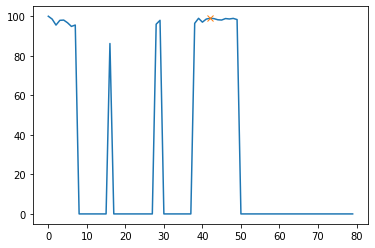

In [163]:
all1 = []
for t in all_scores:
    if len(t) > 0 and t[0] > 0.5:
        #print(t[0])
        all1.append(t[0])
    else:
        all1.append(0)


d_init_x = -1
d_init_y = -1
d_init_z = -1
all1     = []

for i, t in enumerate(all_scores):
    if len(t) > 0 and t[0] > 0.5:
        if d_init_x == -1:
            d_init_x = all_target[i][0][0]
            d_init_y = all_target[i][0][1]
            d_init_z = i
        
        temp_dist = np.min([100, np.linalg.norm([all_target[i][0][0]-d_init_x, all_target[i][0][1]-d_init_y, i-d_init_z])])
        all1.append(temp_dist)
        d_init_x = all_target[i][0][0]
        d_init_y = all_target[i][0][1]
        d_init_z = i
    else:
        all1.append(100)
all1 = 100-np.array(all1)

from scipy.signal import find_peaks

peaks, _ = find_peaks(all1, distance=8, width=4)
#print(a.shape)
plt.plot(all1)
plt.plot(peaks, all1[peaks], 'x')
print(peaks)

slice location  0 49
[[  2.   273.25  44.   388.75]]


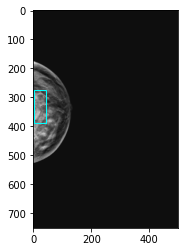

In [32]:
case_index   = random.randint(0, len(valid_dataset))
img, all_target, _    = valid_dataset[case_index]
img          = img.astype('float32')
#img        = a.astype('float32')
#case_index = 0#random.randint(0, img.shape[0]-1)
#case_index = peaks[0]-5
plt.imshow(img[0], cmap='gray')
ax   = plt.gca()
case_index  = 0
print('slice location ', case_index, len(valid_dataset))

if 1:#len(all_target[case_index]) > 0 and all_scores[case_index][0] > 0.2:
    temp  = all_target['boxes'].data.cpu().numpy()#[case_index]
    print(temp)
    #print(case_index, all_scores[case_index])
    index = 0
    #rect  = patches.Rectangle((temp[0], temp[1]), temp[2]-temp[0], temp[3]-temp[1], linewidth=1, edgecolor='cyan', fill = False)
    rect  = patches.Rectangle((temp[index][0], temp[index][1]), temp[index][2]-temp[index][0], temp[index][3]-temp[index][1], linewidth=1, edgecolor='cyan', fill = False)
    ax.add_patch(rect)
else:
    print('Not found 8')

plt.show()
case_index = case_index+1

In [ ]:
# Validation Iteration #10 loss: 0.26083502173423767
# Validation Iteration #20 loss: 0.12475015223026276
# Validation Iteration #30 loss: 0.2311360090970993
# Validation Iteration #40 loss: 0.07870643585920334
# Validation Iteration #50 loss: 0.12904797494411469
# 0.17835015669465065

# Validation Iteration #10 loss: 0.16890683770179749
# Validation Iteration #20 loss: 0.12697485089302063
# Validation Iteration #30 loss: 0.202874094247818
# Validation Iteration #40 loss: 0.1275915801525116
# Validation Iteration #50 loss: 0.16607160866260529
# 0.17254152543842793

# Validation Iteration #10 loss: 0.14864173531532288
# Validation Iteration #20 loss: 0.13806253671646118
# Validation Iteration #30 loss: 0.13079851865768433
# Validation Iteration #40 loss: 0.09259304404258728
# Validation Iteration #50 loss: 0.13366109132766724
# 0.1608045955002308

# Validation Iteration #10 loss: 0.2190426141023636
# Validation Iteration #20 loss: 0.10993507504463196
# Validation Iteration #30 loss: 0.08774184435606003
# Validation Iteration #40 loss: 0.14777813851833344
# Validation Iteration #50 loss: 0.08807449787855148
# 0.1679838129878044

# fasterrcnn_resnet50_dbt22.pth
# Validation Iteration #10 loss: 0.12817245721817017
# Validation Iteration #20 loss: 0.3029731810092926
# Validation Iteration #30 loss: 0.06146375834941864
# Validation Iteration #40 loss: 0.08439958095550537
# Validation Iteration #50 loss: 0.059381939470767975
# 0.10177689090371132

In [ ]:
# [STAR] For doing inference of the model

all_target = []
all_scores = []

#device = torch.device("cpu")
#model.to(device)
model.load_state_dict(torch.load('fasterrcnn_resnet50_dbt22.pth'))
model.eval()



for images, targets, image_ids in valid_data_loader:
    new_images  = []
    for img in images:
        new_images.append(torch.Tensor(img).to(device))

    images    = new_images
    targets   = [{k: v.to(device) for k, v in t.items()} for t in targets]
    loss_dict = model(images)
    print(loss_dict)
    
    #print(loss_dict[0]['boxes'].data.cpu().numpy())
    
    all_scores.append(loss_dict[0]['scores'].data.cpu().numpy())
    all_target.append(loss_dict[0]['boxes'].data.cpu().numpy())

Ground Truth  [[ 98.25 284.75 177.25 378.75]] 27


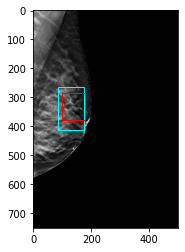

In [131]:
# [STAR] Code to compare the ground truth and predicted mask



case_index        = random.randint(0, len(valid_dataset)-1)
images, b, c = valid_dataset[case_index]

print('Ground Truth ', b['boxes'].data.cpu().numpy(), case_index)

plt.imshow(images[0], cmap='gray')
ax   = plt.gca()

# if(len(all_target1[case_index]) > 0):
#     #print(all_target1[index])
#     #print(all_scores1[index])
    
#     temp  = all_target1[case_index]
#     index = 0
#     rect  = patches.Rectangle((temp[index][0], temp[index][1]), temp[index][2]-temp[index][0], temp[index][3]-temp[index][1], linewidth=1, edgecolor='yellow', fill = False)
#     ax.add_patch(rect)
# else:
#     print('Not found 9')

if(len(all_target[case_index]) > 0):
    #print(all_target[index])
    #print(all_scores[index])
    
    temp  = all_target[case_index]
    index = 0
    rect  = patches.Rectangle((temp[index][0], temp[index][1]), temp[index][2]-temp[index][0], temp[index][3]-temp[index][1], linewidth=1, edgecolor='cyan', fill = False)
    ax.add_patch(rect)
else:
    print('Not found 8')

temp  = b['boxes'].data.cpu().numpy()#all_target[index]
index = 0
rect  = patches.Rectangle((temp[index][0], temp[index][1]), temp[index][2]-temp[index][0], temp[index][3]-temp[index][1], linewidth=1, edgecolor='red', fill = False)
ax.add_patch(rect)


#rect = patches.Rectangle((0, 0), 500, 100, linewidth=2, edgecolor='cyan', fill = False)

plt.show()
case_index = case_index+1

In [137]:
all_target[case_index-1]

array([[ 84.049545, 412.44092 , 141.16986 , 450.9068  ],
       [ 28.40858 , 237.6326  ,  62.980476, 269.77023 ]], dtype=float32)

In [ ]:
# Error cases for fasterrcnn_resnet50_dbt15.pth
Ground Truth  [[ 10.75 304.    51.25 333.75]] 5
Ground Truth  [[ 19.   416.25  63.5  447.75]] 6
Ground Truth  [[188.25 309.5  216.5  369.75]] 7
Ground Truth  [[193.25 389.5  228.   453.5 ]] 8
Ground Truth  [[463.75 150.5  498.5  222.75]] 14
Ground Truth  [[170.   335.25 195.5  362.25]] 23
Ground Truth  [[345.25 414.5  472.25 536.5 ]] 30
Ground Truth  [[451.5  333.75 496.   382.  ]] 34
Ground Truth  [[398.   166.75 468.25 222.  ]] 37
Ground Truth  [[317.75 332.75 388.75 394.  ]] 44
Ground Truth  [[  2.   273.25  44.   388.75]] 45
Ground Truth  [[5.0000e-01 3.9825e+02 6.1500e+01 5.1375e+02]] 46

# Error cases for fasterrcnn_resnet50_dbt14.pth
Ground Truth  [[188.25 309.5  216.5  369.75]] 7
Ground Truth  [[193.25 389.5  228.   453.5 ]] 8
Ground Truth  [[317.75 332.75 388.75 394.  ]] 44
Ground Truth  [[299.25 347.75 324.25 387.  ]] 48

In [33]:
# [TEMPORARY]

def resample_image(itk_image, out_spacing=(1.0, 1.0, 1.5), is_label=False):
    original_spacing = itk_image.GetSpacing()
    original_size    = itk_image.GetSize()

    #print(original_size[0], original_spacing[0], out_spacing[0], 128, original_size[0]*(original_spacing[0]))
    print('out_spacing is ', out_spacing)
    out_size = [int(np.round(original_size[0]*(original_spacing[0]/out_spacing[0]))),
                int(np.round(original_size[1]*(original_spacing[1]/out_spacing[1]))),
                int(np.round(original_size[2]*(original_spacing[2]/out_spacing[2])))]
    print('out size is ', out_size)
    #out_size = [128, 128, 128]
    resample = sitk.ResampleImageFilter()
    resample.SetNumberOfThreads(12)
    resample.SetOutputSpacing(out_spacing)
    resample.SetSize(out_size)
    resample.SetOutputDirection(itk_image.GetDirection())
    resample.SetOutputOrigin(itk_image.GetOrigin())
    resample.SetTransform(sitk.Transform())
    resample.SetDefaultPixelValue(itk_image.GetPixelIDValue())

    if is_label:
        resample.SetInterpolator(sitk.sitkNearestNeighbor)
    else:
        #resample.SetInterpolator(sitk.sitkBSpline)
        #resample.SetInterpolator(sitk.sitkGaussian) # not good
        resample.SetInterpolator(sitk.sitkLinear)

    return resample.Execute(itk_image) 


dbtvol = np.fromfile('/media/drilnvm/ubuntudata2/TEST-DBT-RECONS/04140608-LE-L-CC_3000x1200x80.4_0.0005_-0.2_1_15.raw', dtype=np.float32)
dbtvol = np.reshape(dbtvol, [80, 1200, 3000])
dbtvol = sitk.GetImageFromArray(dbtvol)
dbtvol.SetSpacing(( 0.085, 0.085, 0.75))


dbtvol1 = resample_image(dbtvol, out_spacing=(0.085, 0.085, 1), is_label=False)
dbtvol1 = sitk.GetArrayFromImage(dbtvol1)
#dbtvol1 = np.flatten(dbtvol1)
dbtvol1.tofile('/media/drilnvm/ubuntudata2/TEST-DBT-RECONS/04140608-LE-L-CC_3000x1200x60.4_0.0005_-0.2_1_15_gaussian.raw')

#print(dbtvol1.shape)
#resampled_mask  = resample_image(segmentation, out_spacing=(2.0, 2.0, 3), is_label=True)
        

out_spacing is  (0.085, 0.085, 1)
out size is  [3000, 1200, 60]


In [9]:
dbtvol = np.fromfile('/media/drilnvm/ubuntudata2/TEST-DBT-RECONS/04140608-LE-L-CC_3000x1200x80.4_0.0005_-0.2_1_15.raw', dtype=np.float32)
dbtvol = np.reshape(dbtvol, [80, 1200, 3000])
print(dbtvol.shape)

(80, 1200, 3000)
